In [1]:
from HeaderP import *

In [60]:
from astropy.io import fits
hdul = fits.open('apogee_withbprp_gdr3reportedparams_apogeefullcols.fits')
data = hdul[1].data



In [61]:
data['GAIAEDR3_SOURCE_ID']
len(data['GAIAEDR3_SOURCE_ID'])

693243

In [62]:
data.columns

ColDefs(
    name = 'FILE'; format = '64A'
    name = 'APOGEE_ID'; format = '30A'
    name = 'TARGET_ID'; format = '58A'
    name = 'APSTAR_ID'; format = '71A'
    name = 'ASPCAP_ID'; format = '77A'
    name = 'TELESCOPE'; format = '6A'
    name = 'LOCATION_ID'; format = 'J'; null = 999999
    name = 'FIELD'; format = '20A'
    name = 'ALT_ID'; format = '30A'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'H'; format = 'E'
    name = 'H_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'SRC_H'; format = '16A'
    name = 'WASH_M'; format = 'E'
    name = 'WASH_M_ERR'; format = 'E'
    name = 'WASH_T2'; format = 'E'
    name = 'WASH_T2_ERR'; format = 'E'
    name = 'DDO51'; format = 'E'
    name = 'DDO51_ERR'; format = 'E'
    name = 'IRAC_3_6'; format = 'E'
    name = 'IRAC_3_6_ERR'; format = 'E'


In [63]:
apogee = pd.DataFrame(np.array((data['GAIAEDR3_SOURCE_ID'], data['RA'],
                                data['DEC'],data['M_H'],
                               data['M_H_ERR'], data['ALPHA_M'], data['ALPHA_M_ERR'],
                                data['TEFF'],data['LOGG'],
                               data['N_FE'],data['C_FE'],data['APOGEE_ID'],
                               data['CI_FE'],data['O_FE'],data['MG_FE'],
                               data['AL_FE'],data['SI_FE'],data['P_FE'],
                               data['S_FE'],data['K_FE'],data['CA_FE'],
                               data['TI_FE'],data['CR_FE'],data['MN_FE'],
                               data['NI_FE'],data['CU_FE'],data['YB_FE'],
                               [str(i) for i in data['FIELD']],data['ASPCAPFLAG'],
                               data['LOGG'])).T,
                     columns=['source_id','ra','dec','M_H','M_H_ERR','ALPHA_M', 
                              'ALPHA_M_ERR','teff','logg','N_FE','C_FE','ID',
                              'CI_FE','O_FE','MG_FE','AL_FE','SI_FE','P_FE',
                             'S_FE','K_FE','CA_FE','TI_FE','CR_FE',
                             'MN_FE','NI_FE','CU_FE','YB_FE','FIELD','ASPCAPFLAG',
                             'LOGG'])

#apogee.to_pickle('APOGEE_gaiaDR3_cm.pkl')

In [64]:
kinage = pd.read_csv('NewKinAge_2022.csv')
kinage = kinage.dropna(subset=['kin_age','ra','dec']).reset_index(drop=True)
apogee = apogee.dropna(subset=['ID','FIELD','ra','dec']).reset_index(drop=True)
len(kinage), len(apogee)

(26535, 693243)

In [65]:
def crossmatch(df1,df2,sep=1.2):
    # df1
    c1 = SkyCoord([i*u.deg for i in df1['ra'].values], 
                  [i*u.deg for i in df1['dec'].values], frame='icrs')
    # apogee
    c2 = SkyCoord([i*u.deg for i in np.array(df2['ra'].values, dtype=float)], 
                  [i*u.deg for i in np.array(df2['dec'].values, dtype=float)], frame='icrs')
    
    # cross-match
    idx_sdss, d2d_sdss, d3d_sdss = c2.match_to_catalog_sky(c1)
    idx=idx_sdss[d2d_sdss<sep*u.arcsec]
    d2d=d2d_sdss[d2d_sdss<sep*u.arcsec]

    df1df2=df2[d2d_sdss<sep*u.arcsec]
    
    print('finished cm')
    for i in df1.columns:
        df1df2[i]=df1.iloc[idx][i].values
        
    return df1df2

In [66]:
kinageapogee_cm = crossmatch(kinage, apogee)


finished cm


<ipython-input-65-69ebfcaac72e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1df2[i]=df1.iloc[idx][i].values
<ipython-input-65-69ebfcaac72e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1df2[i]=df1.iloc[idx][i].values
<ipython-input-65-69ebfcaac72e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [67]:
kinageapogee_cm.to_pickle('apogee_kinage_cm.pkl')

(7000.0, 3000.0)

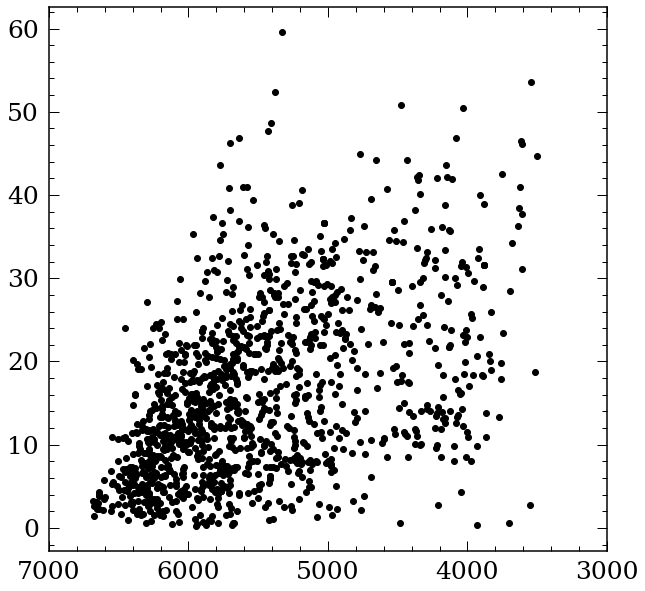

In [68]:
plt.plot(kinageapogee_cm['teff_calc'], kinageapogee_cm['Prot'], 'ko')
plt.xlim([7000,3000])

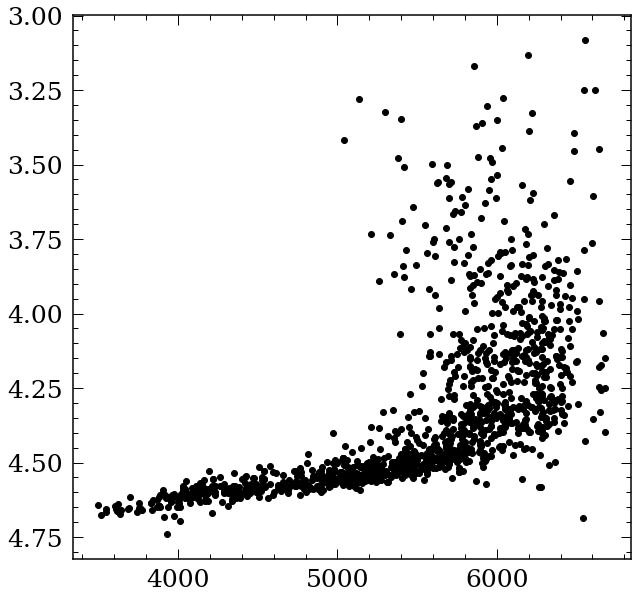

In [69]:

plt.plot(kinageapogee_cm['teff_calc'], 
         np.array(kinageapogee_cm['LOGG'],dtype=float), 'ko')
plt.gca().invert_yaxis()


# get spectra

In [70]:
kinageapogee_cm = kinageapogee_cm.reset_index(drop=True)

filenames=[]
fields=kinageapogee_cm.FIELD
filename=kinageapogee_cm.ID
for i in range(len(kinageapogee_cm)):
    path='/moto/astro/projects/APOGEE_dr16/apo25m/'+str(fields[i])+'/aspcapStar-r12-'+str(filename[i])+'.fits'
    filenames.append(path)
kinageapogee_cm['path']=filenames
kinageapogee_cm['path']

np.save('Mdwarfnames',filenames)



In [71]:
import os
files = os.listdir('Mdwarfs')

In [72]:
%matplotlib inline

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from HeaderP import *
plt.rcParams.keys()
plt.rc('font', family='serif')
params = {
   'axes.labelsize': 30,
   'axes.linewidth': 1.5,
   'legend.fontsize': 25,
   'legend.frameon': False,
   'lines.linewidth': 2,
   'xtick.direction': 'in',
   'xtick.labelsize': 25,
   'xtick.major.bottom': True,
   'xtick.major.pad': 10,
   'xtick.major.size': 10,
   'xtick.major.width': 1,
   'xtick.minor.bottom': True,
   'xtick.minor.pad': 3.5,
   'xtick.minor.size': 5,
   'xtick.minor.top': True,
   'xtick.minor.visible': True,
   'xtick.minor.width': 1,
   'xtick.top': True,
   'ytick.direction': 'in',
   'ytick.labelsize': 25,
   'ytick.major.pad': 10,
   'ytick.major.size': 10,
   'ytick.major.width': 1,
   'ytick.minor.pad': 3.5,
   'ytick.minor.size': 5,
   'ytick.minor.visible': True,
   'ytick.minor.width': 1,
   'ytick.right': True,
   'figure.figsize': [10,10], # instead of 4.5, 4.5
   'savefig.format': 'eps',
   }
plt.rcParams.update(params)

def fitpoints(x,y):
    z = np.polyfit(x,y,1)
    p = np.poly1d(z)
    return p

import matplotlib.gridspec as gridspec
def diagnostics_1to1(ds, figname="1to1_label"):
        """ Plots survey labels vs. training labels, color-coded by survey SNR """
        label_names = ds.get_plotting_labels()
        nlabels = len(label_names)
        print(nlabels)
        reference_labels = ds.test_label
        test_labels = ds.test_label_vals

        for i in range(nlabels):
            snr = ds.test_SNR
            name = label_names[i]
            orig = reference_labels[:,i]
            cannon = test_labels[:,i]
            
            '''
            m1=cannon>-500
            m2=orig>-500
            m=m1&m2
            
            orig, cannon, snr=orig[m],cannon[m],snr[m]
            '''
            # calculate bias and scatter
            scatter = np.round(np.std(orig-cannon),5)
            bias  = np.round(np.mean(orig-cannon),5)

            low = np.minimum(min(orig), min(cannon))
            high = np.maximum(max(orig), max(cannon))

            fig = plt.figure(figsize=(10,6))
            gs = gridspec.GridSpec(1,2,width_ratios=[2,1], wspace=0.3)
            ax1 = plt.subplot(gs[0])
            ax2 = plt.subplot(gs[1])
            ax1.plot([low, high], [low, high], 'k-', linewidth=2.0, label="x=y")
            ax1.set_xlim(low, high)
            ax1.set_ylim(low, high)
            ax1.legend(fontsize=14, loc='lower right')

            pl = ax1.scatter(orig, cannon, marker='x', c=snr,
                    vmin=50, vmax=200, alpha=0.7)
            cb = plt.colorbar(pl, ax=ax1, orientation='horizontal')
            cb.set_label('SNR from Test Set', fontsize=12)
            textstr = 'Scatter: %s \nBias: %s' %(scatter, bias)
            ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes,
                    fontsize=14, verticalalignment='top')
            ax1.tick_params(axis='x', labelsize=14)
            ax1.tick_params(axis='y', labelsize=14)
            ax1.set_xlabel("Reference Value", fontsize=14)
            ax1.set_ylabel("Cannon Test Value", fontsize=14)
            ax1.set_title("1-1 Plot of Label " + r"$%s$" % name)
            diff = cannon-orig
            npoints = len(diff)
            mu = np.mean(diff)
            sig = np.std(diff)
            #ax2.hist(diff, orientation='horizontal')
            ax2.hist(diff, range=[-3*sig,3*sig], color='k', bins=int(np.sqrt(npoints)),
                    orientation='horizontal', alpha=0.3, histtype='stepfilled')
            ax2.tick_params(axis='x', labelsize=14)
            ax2.tick_params(axis='y', labelsize=14)
            ax2.set_xlabel("Count", fontsize=14)
            ax2.set_ylabel("Difference", fontsize=14)
            ax2.axhline(y=0, c='k', lw=3, label='Difference=0')
            ax2.set_title("Training Versus Test Labels for $%s$" %name,
                    fontsize=14)
            ax2.legend(fontsize=14)
            figname_full = "%s_%s.png" %(figname, i)

import os
from astropy.io import fits as pyfits
def load_spectra(data_dir):
    """ Reads wavelength, flux, and flux uncertainty data from apogee fits files

    Parameters
    ----------
    data_dir: str
        Name of the directory containing all of the data files

    Returns
    -------
    wl: ndarray
        Rest-frame wavelength vector

    fluxes: ndarray
        Flux data values

    ivars: ndarray
        Inverse variance values corresponding to flux values
    """
    print("Loading spectra from directory %s" %data_dir)
    files = list(sorted([data_dir + "/" + filename
             for filename in os.listdir(data_dir) if filename.endswith('fits')]))
    nstars = len(files)  
    for jj, fits_file in enumerate(files):
        file_in = pyfits.open(fits_file)
        #print(file_in)
        flux = np.array(file_in[1].data)
        if jj == 0:
            npixels = len(flux)
            fluxes = np.zeros((nstars, npixels), dtype=float)
            ivars = np.zeros(fluxes.shape, dtype=float)
            start_wl = file_in[1].header['CRVAL1']
            diff_wl = file_in[1].header['CDELT1']
            val = diff_wl * (npixels) + start_wl
            wl_full_log = np.arange(start_wl,val, diff_wl)
            wl_full = [10 ** aval for aval in wl_full_log]
            wl = np.array(wl_full)
        flux_err = np.array((file_in[2].data))
        badpix = get_pixmask(flux, flux_err)
        ivar = np.zeros(npixels)
        ivar[~badpix] = 1. / flux_err[~badpix]**2
        fluxes[jj,:] = flux
        ivars[jj,:] = ivar
    # convert filenames to actual IDs
    names = np.array([f.split('r12-')[1].split('.fits')[0] for f in files])
    print("Spectra loaded")
    # make sure they are numpy arrays
    return np.array(names), np.array(wl), np.array(fluxes), np.array(ivars)

def get_pixmask(fluxes, flux_errs):
    """ Create and return a bad pixel mask for an APOGEE spectrum

    Bad pixels are defined as follows: fluxes or errors are not finite, or 
    reported errors are <= 0, or fluxes are 0

    Parameters
    ----------
    fluxes: ndarray
        Flux data values 

    flux_errs: ndarray
        Flux uncertainty data values 

    Returns
    -------
    mask: ndarray
        Bad pixel mask, value of True corresponds to bad pixels
    """
    bad_flux = np.logical_or(~np.isfinite(fluxes), fluxes == 0)
    bad_err = (~np.isfinite(flux_errs)) | (flux_errs <= 0)
    bad_pix = bad_err | bad_flux
    return bad_pix



# train the cannon

In [73]:
# read in data and process

from TheCannon import apogee
tr_ID_r, wl_r, tr_flux_r, tr_ivar_r = load_spectra("Mdwarfs")



Loading spectra from directory Mdwarfs
Spectra loaded


(366, 7)


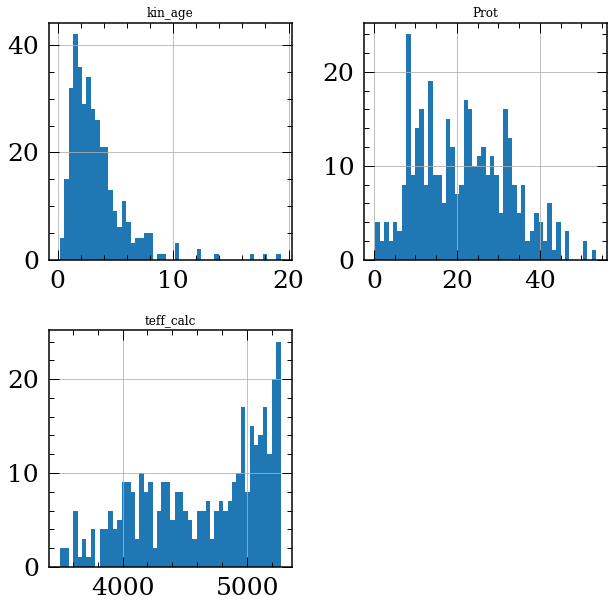

In [74]:
kinageapogee_cm['ASPCAPFLAG'] = [int(i) for i in kinageapogee_cm['ASPCAPFLAG']]
kinageapogee_cm['FLAGREAD']=[i&2**23 for i in kinageapogee_cm.ASPCAPFLAG]
kinageapogee_cm=kinageapogee_cm.loc[kinageapogee_cm['FLAGREAD']==0].reset_index(drop=True)
df_pick = kinageapogee_cm.loc[kinageapogee_cm['ID'].isin(tr_ID_r)].drop_duplicates(subset='ID',keep='first')[['M_H','ALPHA_M','LOGG','kin_age','Prot','ID','teff_calc']].dropna()
df_pick = df_pick.loc[df_pick['teff_calc']<5270]

df_pick.hist(bins=50)


print(np.shape(df_pick))




In [75]:


tr_ID_pick=df_pick['ID'].values

m=np.zeros(len(tr_ID_r),dtype='bool')
for i in range(len(m)):
    if tr_ID_r[i] in tr_ID_pick:
        m[i]=1

tr_ID, wl, tr_flux, tr_ivar = tr_ID_r[m], wl_r, tr_flux_r[m,:], tr_ivar_r[m,:]



In [76]:
tr_label=np.zeros((len(tr_ID),5))

for i in range((len(tr_ID))):
    #print(i)
    tr_label[i,:]=df_pick.loc[df_pick['ID']==tr_ID[i]][['M_H','ALPHA_M','LOGG','kin_age','teff_calc']].values
               

In [77]:
print(len(tr_ID),np.shape(df_pick))
np.shape(tr_label)

366 (366, 7)


(366, 5)

In [78]:
def _SNR(flux, ivar):
    """ Calculate the SNR of a spectrum, ignoring bad pixels

    Parameters
    ----------
    flux: numpy ndarray
        pixel intensities
    ivar: numpy ndarray
        inverse variances corresponding to flux

    Returns
    -------
    SNR: float
    """
    take = ivar > 0
    SNR = float(np.median(flux[take]*(ivar[take]**0.5)))
    return SNR  

In [79]:
#take = tr_ivar > 0
SNR = np.array([_SNR(*s) for s in zip(tr_flux, tr_ivar)])
m_snr=SNR>100
tr_ID, tr_flux, tr_ivar=tr_ID[m_snr],tr_flux[m_snr,:], tr_ivar[m_snr,:]
tr_label=tr_label[m_snr,:]

print(tr_ID.shape)
print(wl.shape)
print(tr_flux.shape)
print(tr_ivar.shape)
print(tr_label.shape)




(292,)
(8575,)
(292, 8575)
(292, 8575)
(292, 5)


In [80]:
train_ID = tr_ID
train_flux = tr_flux
train_ivar = tr_ivar
train_label = tr_label

test_ID = tr_ID
test_flux = tr_flux
test_ivar = tr_ivar
test_label = tr_label


In [81]:
from TheCannon import dataset
#from importlib import reload  
#reload(dataset)

#wl, tr_ID, tr_flux, tr_ivar, tr_label, test_ID, test_flux, test_ivar

ds = dataset.Dataset(wl, train_ID, train_flux, train_ivar, train_label, 
                     test_ID, test_flux, test_ivar)



Loading dataset
This may take a while...


Diagnostic for SNRs of reference and survey objects


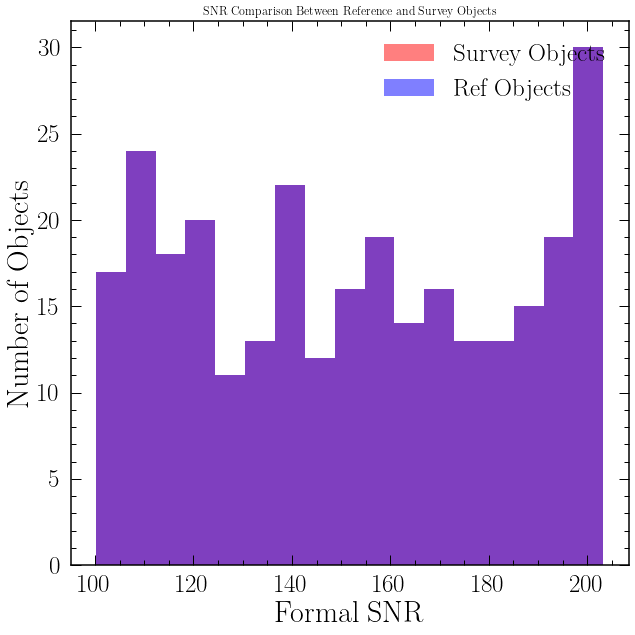

In [82]:
ds.set_label_names(['[M/H]','[a/H]','log(g)','Age','Teff'])
fig = ds.diagnostics_SNR()



Plotting every label against every other


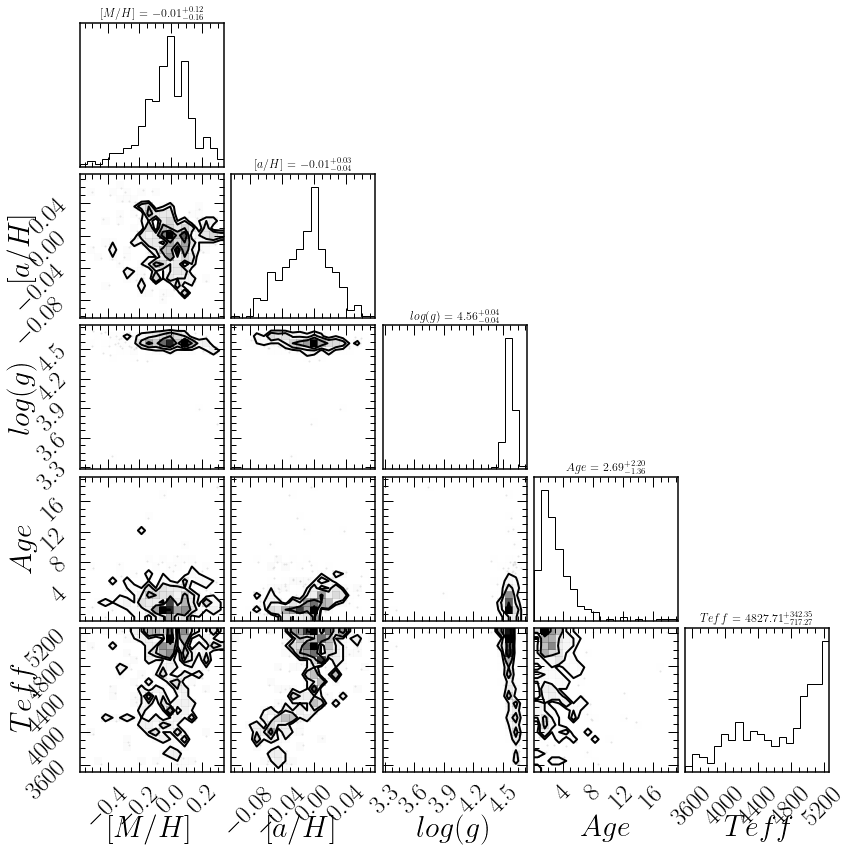

In [83]:
fig = ds.diagnostics_ref_labels()

In [84]:
from TheCannon import model
md = model.CannonModel(2, useErrors=False)
md.fit(ds)

Done training model. 


Diagnostic plot: leading coeffs and scatters across wavelength.


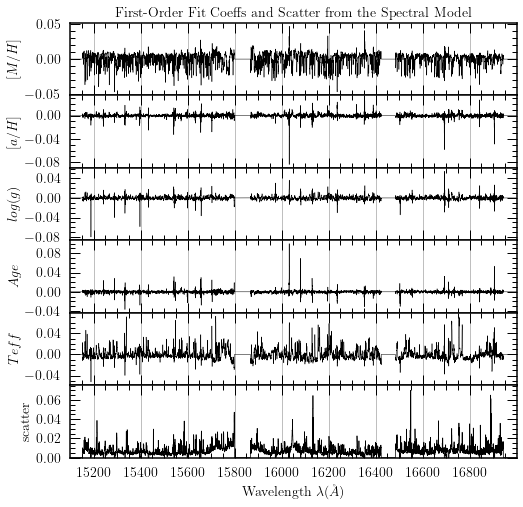

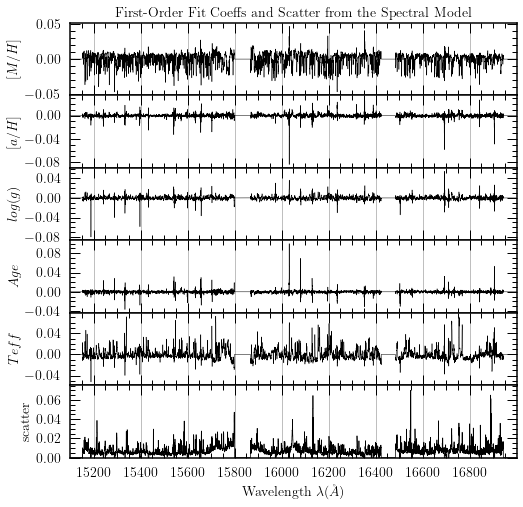

In [85]:
md.diagnostics_leading_coeffs(ds)



Diagnostic plot: histogram of the red chi squareds of the fit
Saved as modelfit_chisqs.png
Inferring Labels
Reference label [M/H]
flagged 28 stars beyond 2-sig of ref labels
Saved list flagged_stars_0.txt
Reference label [a/H]
flagged 28 stars beyond 2-sig of ref labels
Saved list flagged_stars_1.txt
Reference label log(g)
flagged 3 stars beyond 2-sig of ref labels
Saved list flagged_stars_2.txt
Reference label Age
flagged 10 stars beyond 2-sig of ref labels
Saved list flagged_stars_3.txt
Reference label Teff
flagged 0 stars beyond 2-sig of ref labels
Saved list flagged_stars_4.txt
Plotting every label against every other


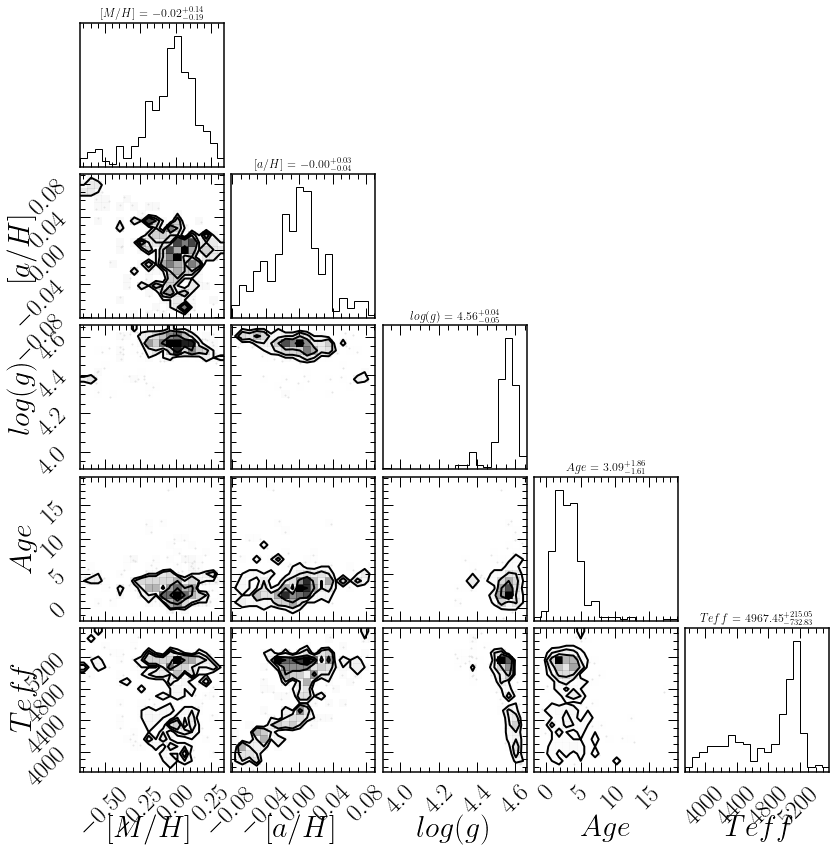

In [86]:
md.diagnostics_plot_chisq(ds)
label_errs = md.infer_labels(ds)
test_labels = ds.test_label_vals
ds.diagnostics_test_step_flagstars()
ds.diagnostics_survey_labels()
ds.tr_label=test_label

In [87]:
#ds.diagnostics_1to1(figname='1to1_label_Prot')

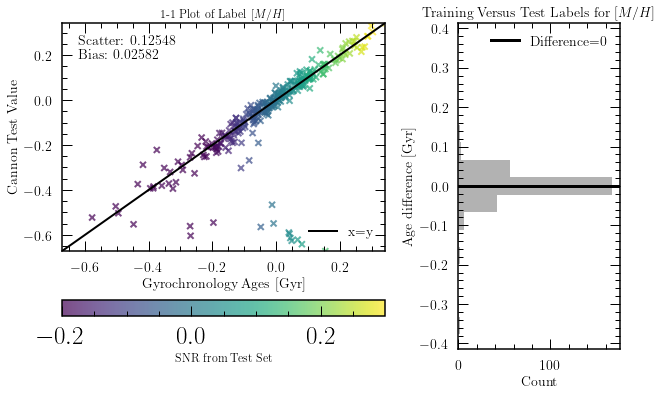

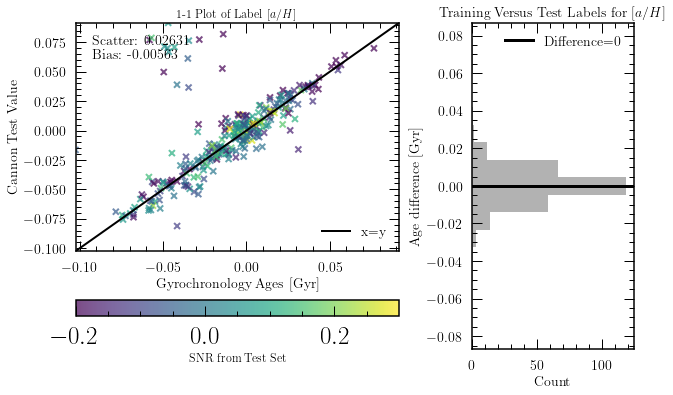

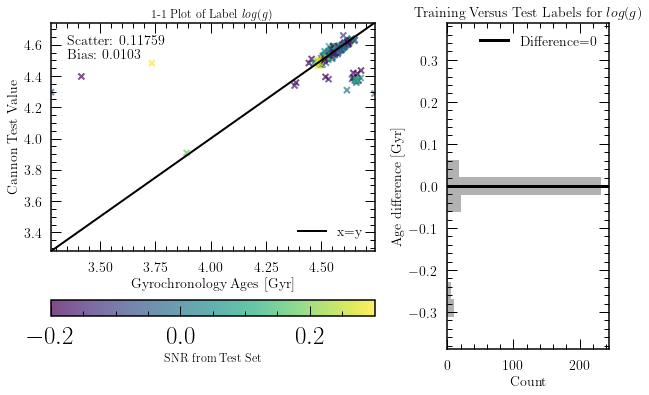

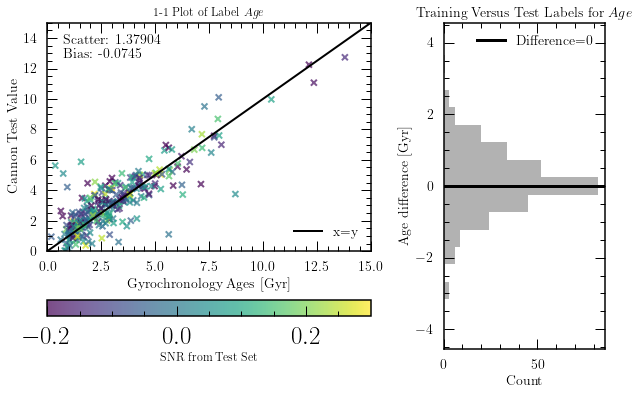

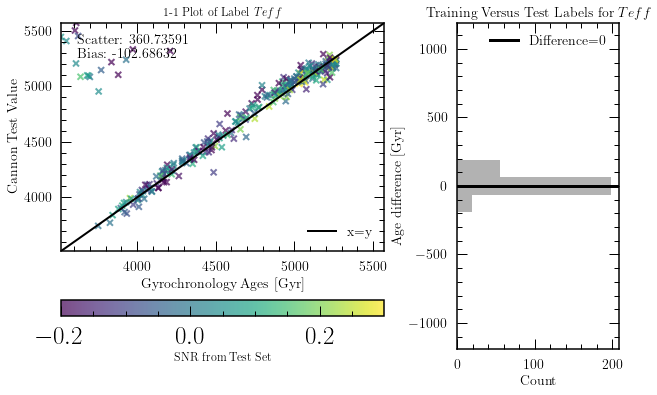

In [90]:
snr = ds.test_SNR
label_names = ds.get_plotting_labels()
nlabels = len(label_names)
reference_labels = ds.tr_label
test_labels = ds.test_label_vals

for i in range(len(label_names)):
    name = label_names[i]
    orig = reference_labels[:,i]
    cannon = test_labels[:,i]
    # calculate bias and scatter
    scatter = np.round(np.std(orig-cannon),5)
    bias  = np.round(np.mean(orig-cannon),5)

    low = np.minimum(min(orig), min(cannon))
    high = np.maximum(max(orig), max(cannon))

    fig = plt.figure(figsize=(10,6))
    gs = gridspec.GridSpec(1,2,width_ratios=[2,1], wspace=0.3)
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    ax1.plot([low, high], [low, high], 'k-', linewidth=2.0, label="x=y")
    ax1.set_xlim(low, high)
    ax1.set_ylim(low, high)
    if i==3:
        ax1.set_xlim(0,15)
        ax1.set_ylim(0,15)
    ax1.legend(fontsize=14, loc='lower right')
    pl = ax1.scatter(orig, cannon, marker='x', c=reference_labels[:,0],
            vmin=-0.2, vmax=0.3, alpha=0.7)
    cb = plt.colorbar(pl, ax=ax1, orientation='horizontal')
    cb.set_label('SNR from Test Set', fontsize=12)
    textstr = 'Scatter: %s \nBias: %s' %(scatter, bias)
    ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes,
            fontsize=14, verticalalignment='top')
    ax1.tick_params(axis='x', labelsize=14)
    ax1.tick_params(axis='y', labelsize=14)
    ax1.set_xlabel("Gyrochronology Ages [Gyr]", fontsize=14)
    ax1.set_ylabel("Cannon Test Value", fontsize=14)
    ax1.set_title("1-1 Plot of Label " + r"$%s$" % name)
    diff = cannon-orig
    npoints = len(diff)
    mu = np.mean(diff)
    sig = np.std(diff)
    #ax2.hist(diff, orientation='horizontal')
    ax2.hist(diff, range=[-3*sig,3*sig], color='k', bins=int(np.sqrt(npoints)),
            orientation='horizontal', alpha=0.3, histtype='stepfilled')
    ax2.tick_params(axis='x', labelsize=14)
    ax2.tick_params(axis='y', labelsize=14)
    ax2.set_xlabel("Count", fontsize=14)
    ax2.set_ylabel("Age difference [Gyr]", fontsize=14)
    ax2.axhline(y=0, c='k', lw=3, label='Difference=0')
    ax2.set_title("Training Versus Test Labels for $%s$" %name,
            fontsize=14)
    ax2.legend(fontsize=14)




In [91]:
np.shape(ds.wl), np.shape(md.coeffs)

((8575,), (8575, 21))

# Check coeffients

Text(0, 0.5, 'leading coefficient')

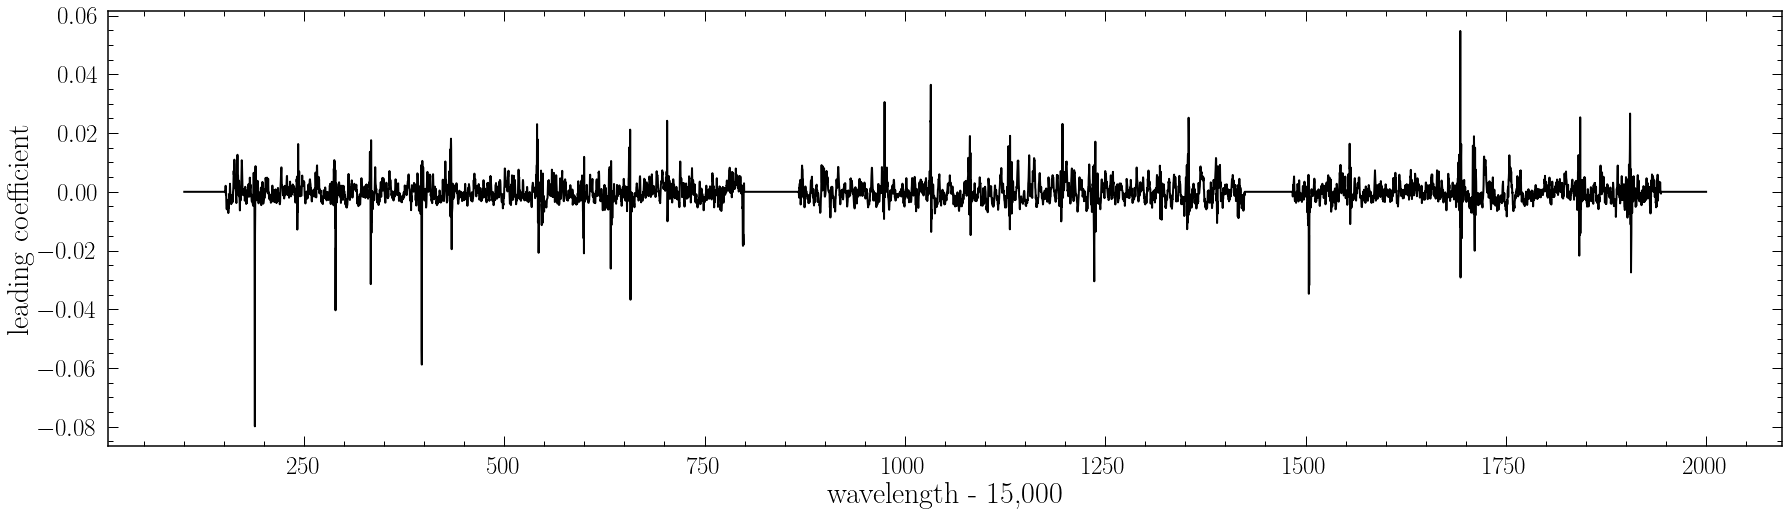

In [92]:
from HeaderP import *
#np.save('wl', ds.wl)
#np.save('agecoe', md.coeffs[:,3])
wl = np.load('wl.npy')
coef = np.load('agecoe.npy')

plt.figure(figsize=(30,8))
plt.plot(wl-15000, coef, 'k-')
plt.xlabel('wavelength - 15,000')
plt.ylabel('leading coefficient')


In [93]:
import apogee
import apogee.tools


In [94]:

linelist = pd.read_table('asu-txt', delim_whitespace=True)
linelist


lambda  specid
0       1500.4148   26.00
1       1500.4157  607.12
2       1500.4177   28.00
3       1500.4184  606.13
4       1500.4184  607.13
...           ...     ...
134452  1700.4533  607.12
134453  1700.4546  608.18
134454  1700.4556   22.00
134455  1700.4577  606.13
134456  1700.4594  606.12

[134457 rows x 2 columns]

  0%|          | 0/9 [00:00<?, ?it/s]<ipython-input-95-d1273d73426d>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linelist_sing['dist'] = abs(linelist_sing['lambda']-impwl_sing[-(i+1)])
<ipython-input-95-d1273d73426d>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linelist_sing['dist'] = abs(linelist_sing['lambda']-impwl_sing[-(i+1)])
 22%|██▏       | 2/9 [00:00<00:00, 14.20it/s]<ipython-input-95-d1273d73426d>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

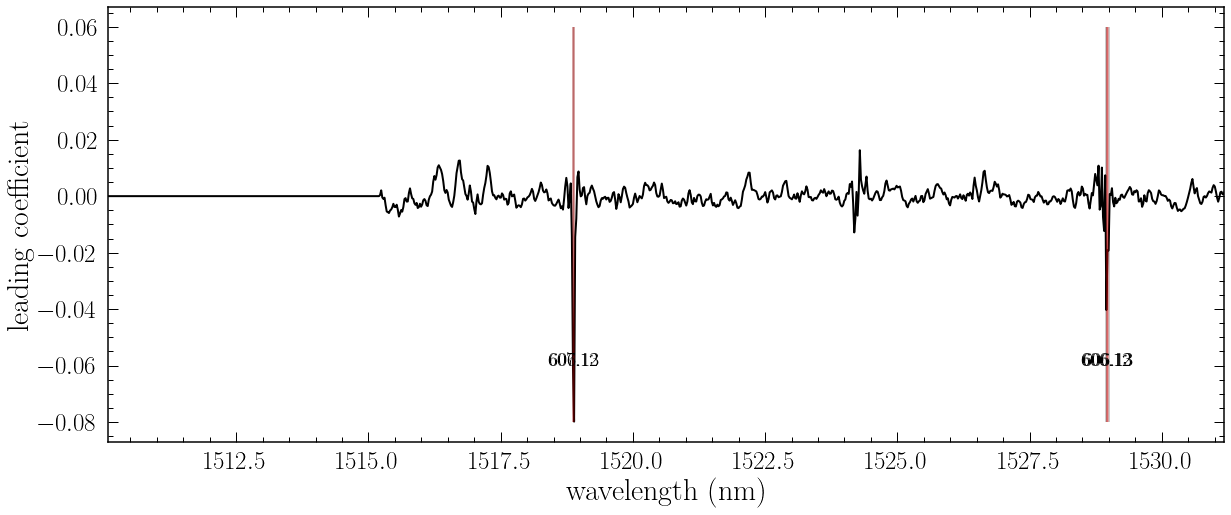

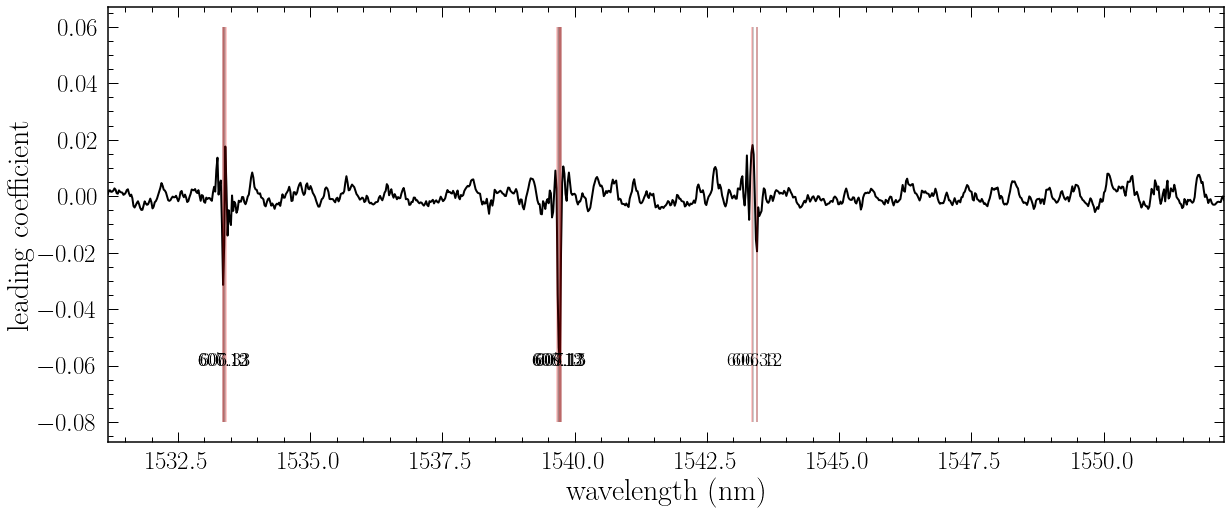

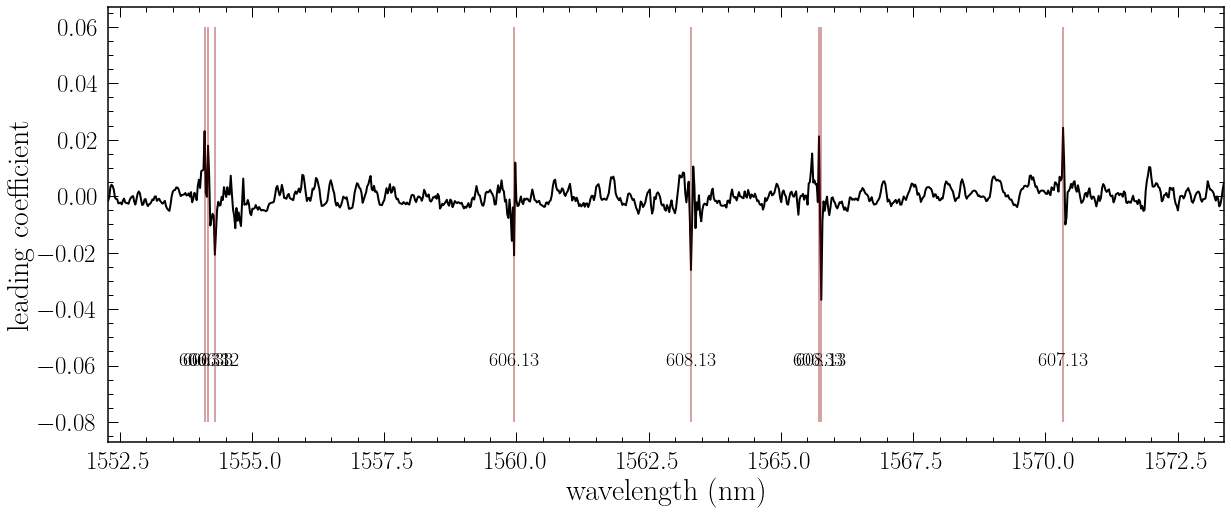

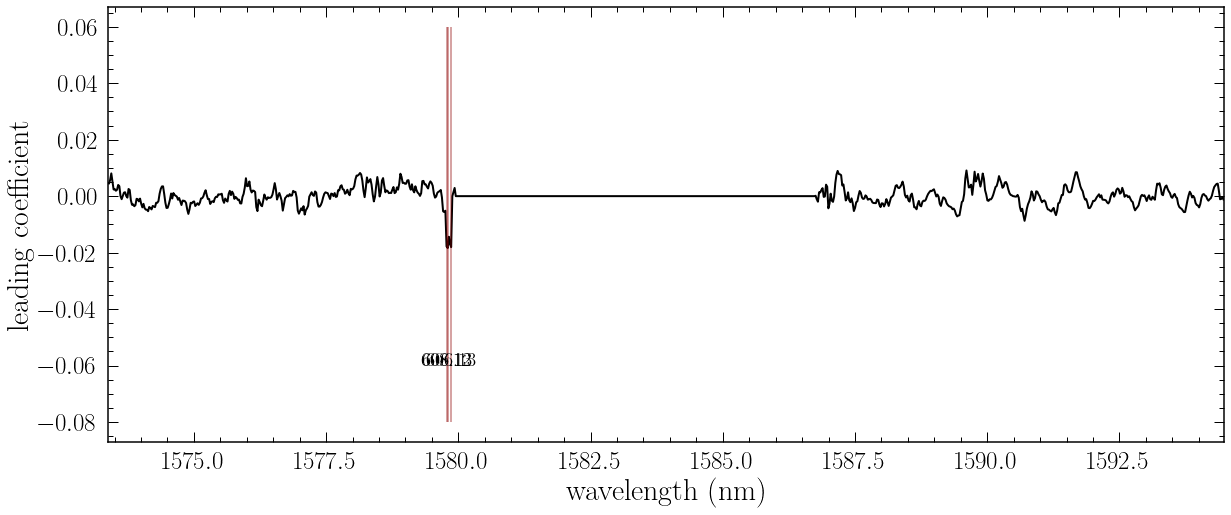

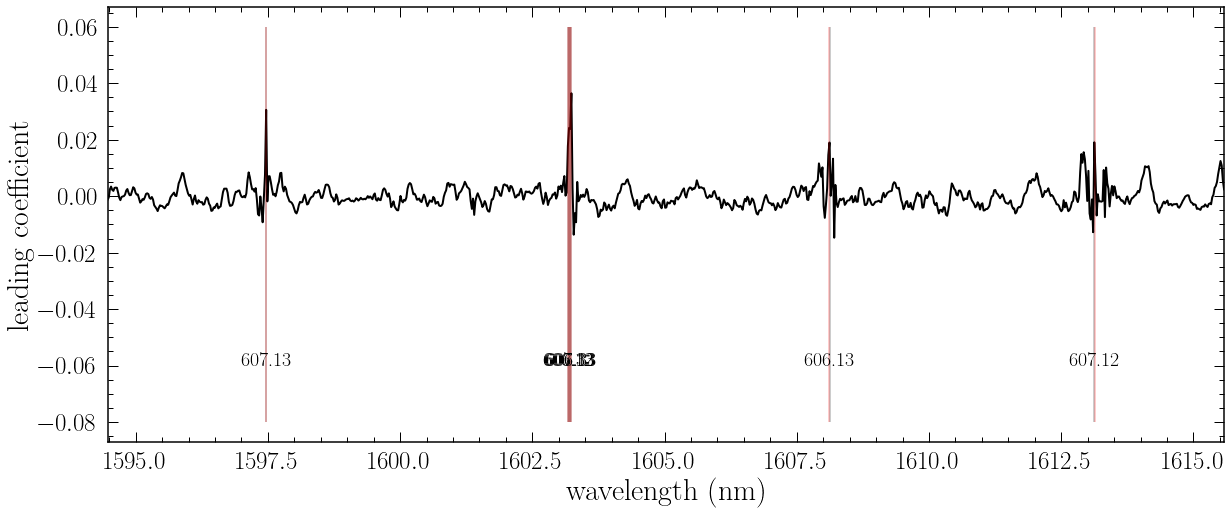

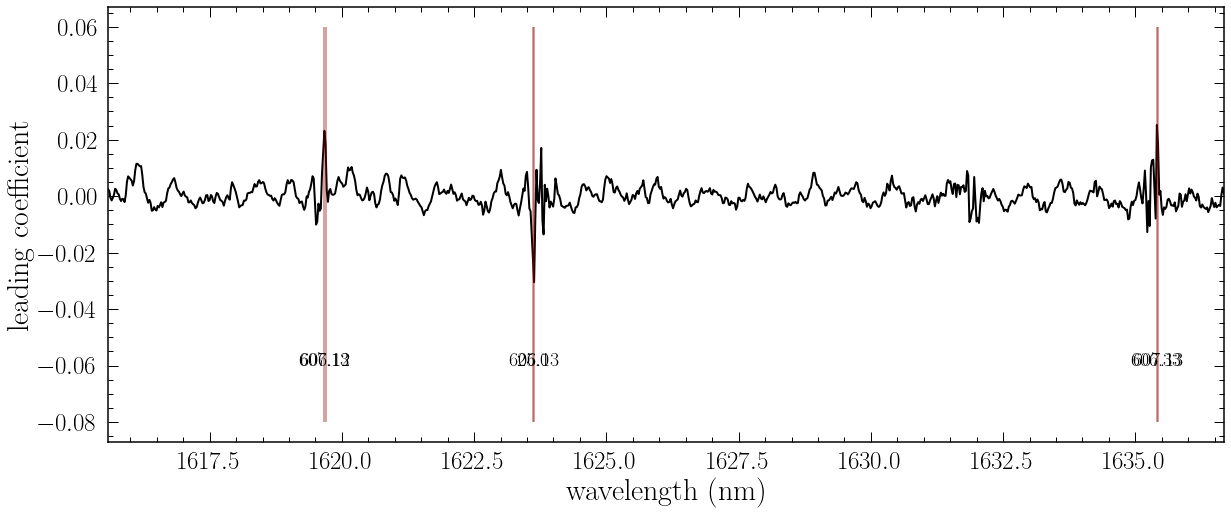

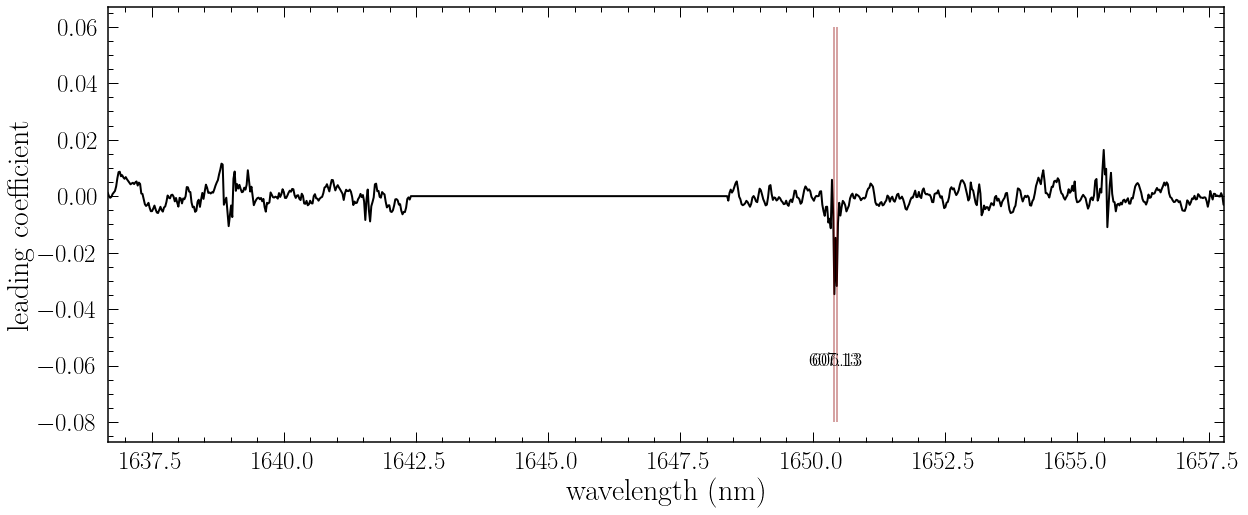

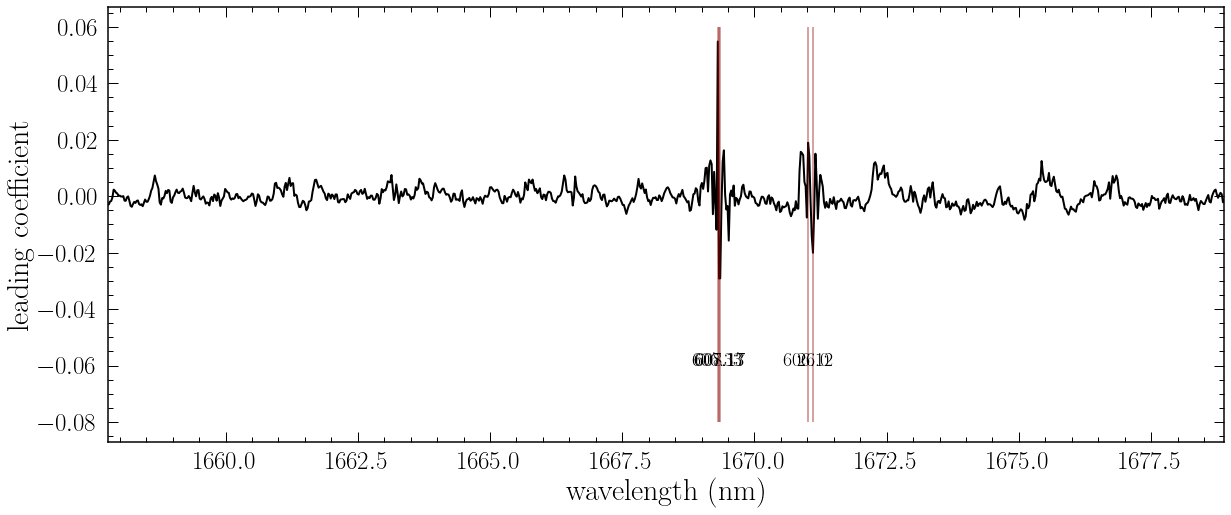

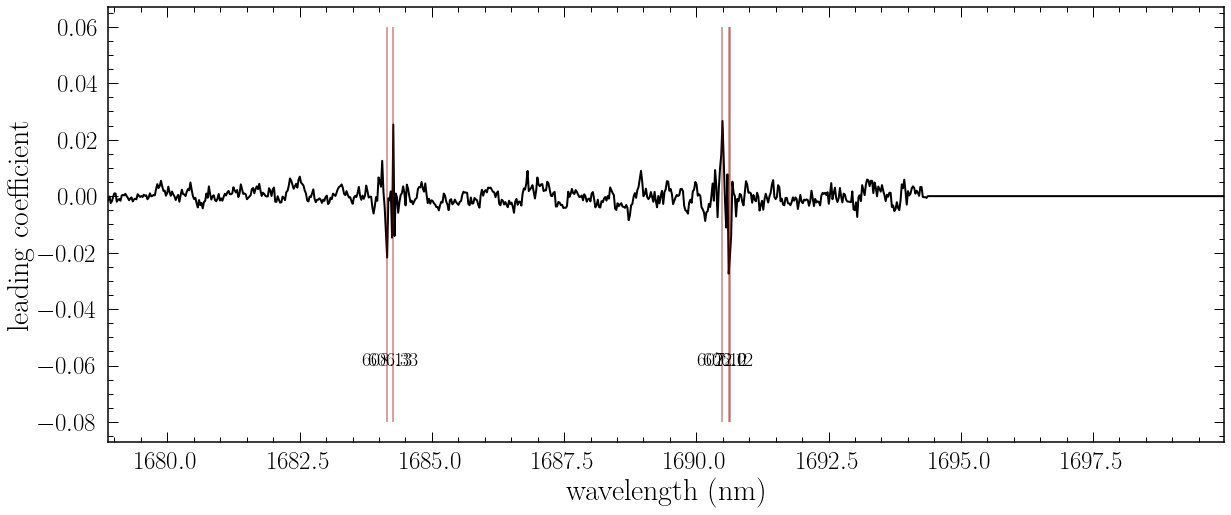

In [95]:
from HeaderP import *
#np.save('wl', ds.wl)
#np.save('agecoe', md.coeffs[:,3])
wl = np.load('wl.npy')
coef = np.load('agecoe.npy')

"""plt.figure(figsize=(30,8))
plt.plot(wl/10, coef, 'k-')
plt.xlabel('wavelength (nm)')
plt.ylabel('leading coefficient')"""


sort_coe, sort_wl = zip(*sorted(zip(abs(coef), wl/10)))

pltlin = 50
splitwl = 10

wlbins = np.linspace(min(wl/10), max(wl/10), splitwl)

impwl = sort_wl[-pltlin:]

for j in trange(splitwl-1):
    plt.figure(figsize=(20,8))
    linelist_sing = linelist.loc[(linelist['lambda']>wlbins[j])&(linelist['lambda']<wlbins[j+1])]
    
    m = (sort_wl>wlbins[j])&(sort_wl<wlbins[j+1])
    
    sort_coe_sing, sort_wl_sing = np.array(sort_coe)[m], np.array(sort_wl)[m]
    impwl_sing = np.array(impwl)[(impwl>wlbins[j])&(impwl<wlbins[j+1])]
    
    plt.plot(wl/10, coef, 'k-')
    for i in range(len(impwl_sing)):
        linelist_sing['dist'] = abs(linelist_sing['lambda']-impwl_sing[-(i+1)])
        linelist_sing = linelist_sing.sort_values(by='dist')
    
        plt.vlines(impwl_sing[-(i+1)], ymin=-0.08, ymax=0.06, color='k', alpha=0.2)
        plt.vlines(linelist_sing['lambda'].iloc[i], ymin=-0.08, ymax=0.06, color='r', alpha=0.2)
        
        plt.text(linelist_sing['lambda'].iloc[i], -0.06, 
                 str(linelist_sing['specid'].iloc[i]), horizontalalignment='center',
                 fontsize=20)
    plt.xlim([wlbins[j],wlbins[j+1]])
    plt.xlabel('wavelength (nm)')
    plt.ylabel('leading coefficient')
    

 38%|███▊      | 19/50 [00:00<00:00, 58.89it/s]<ipython-input-101-8170b1ece341>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,8))
100%|██████████| 50/50 [00:00<00:00, 53.70it/s]


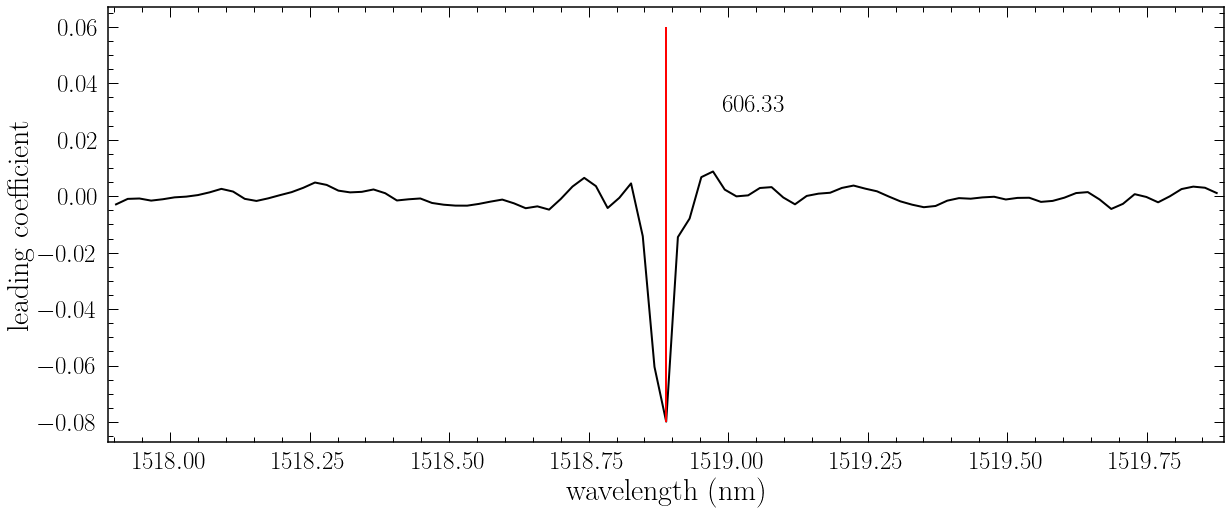

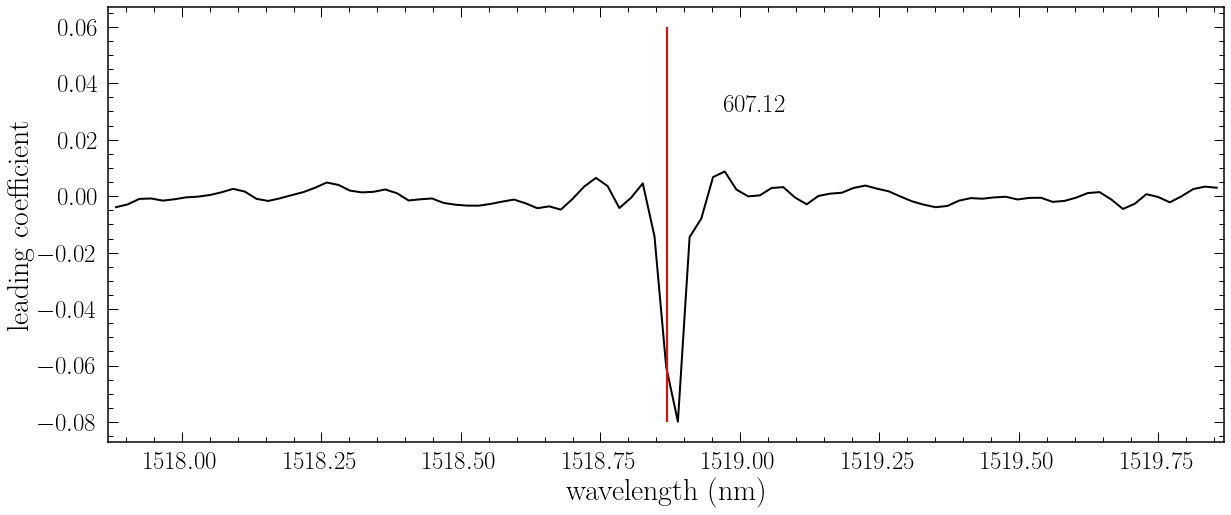

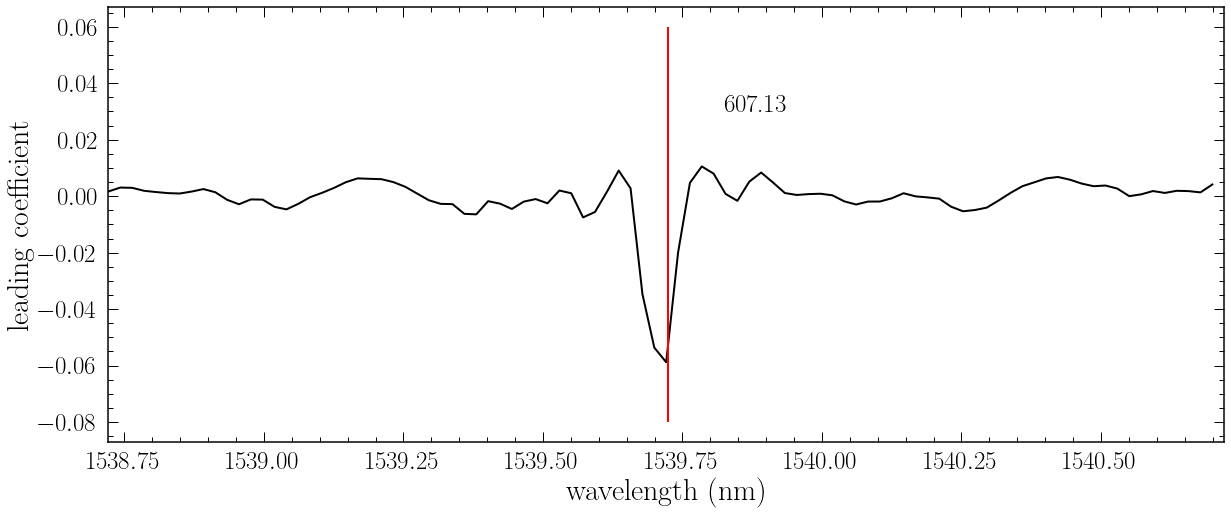

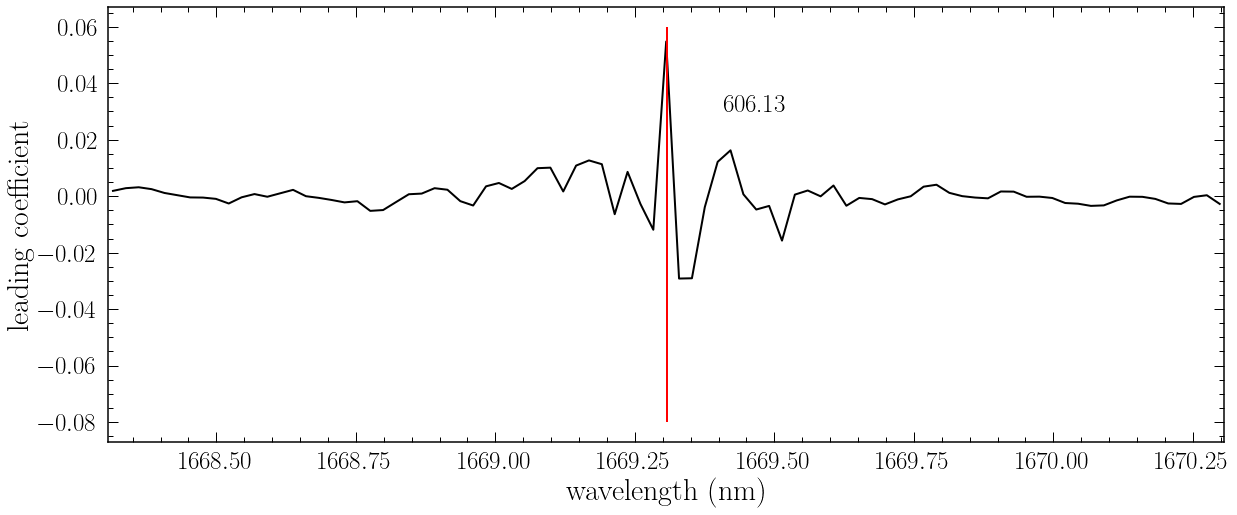

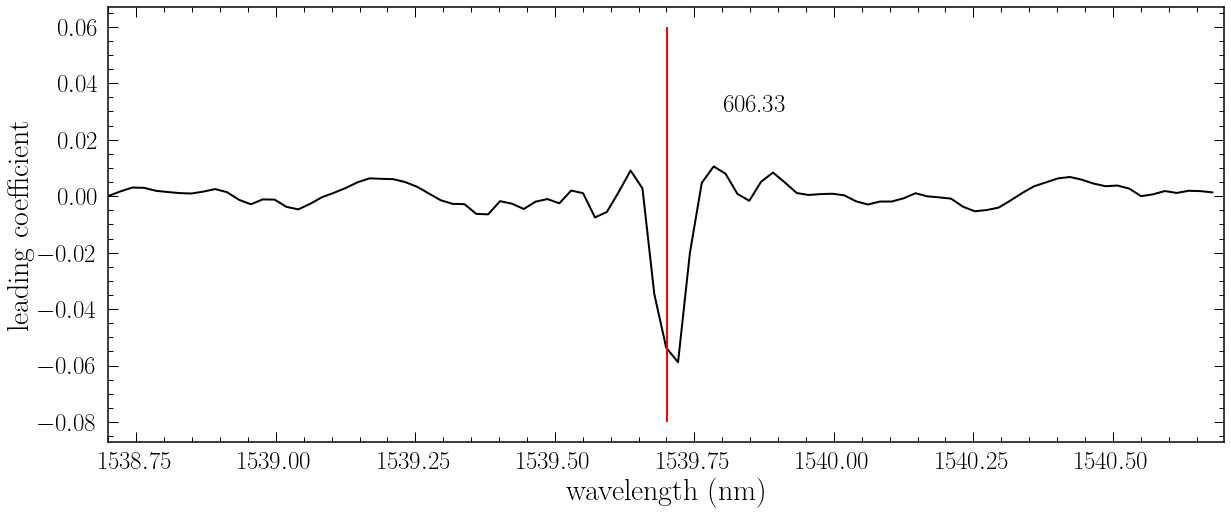

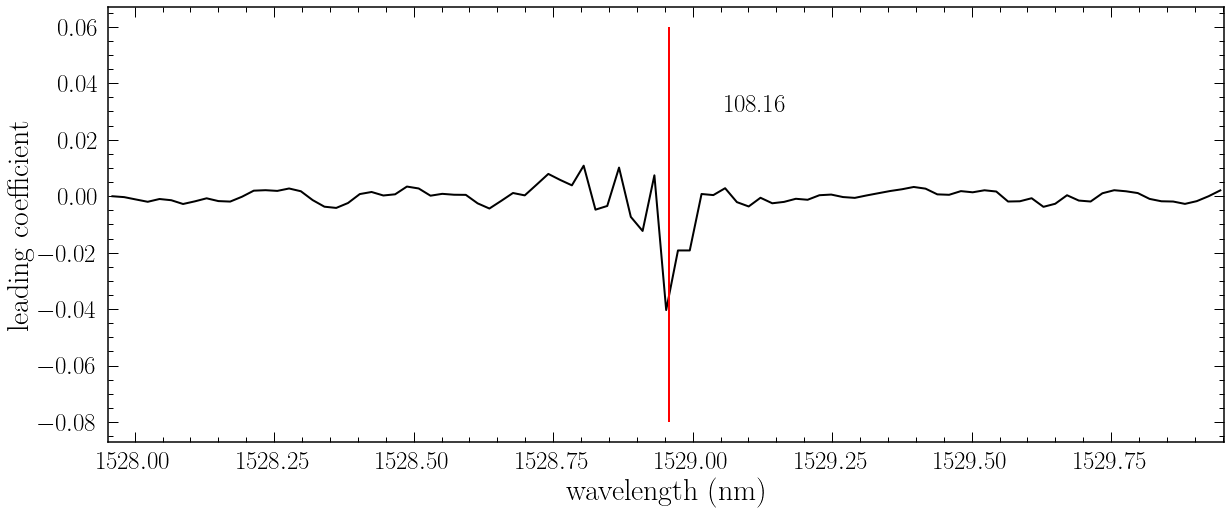

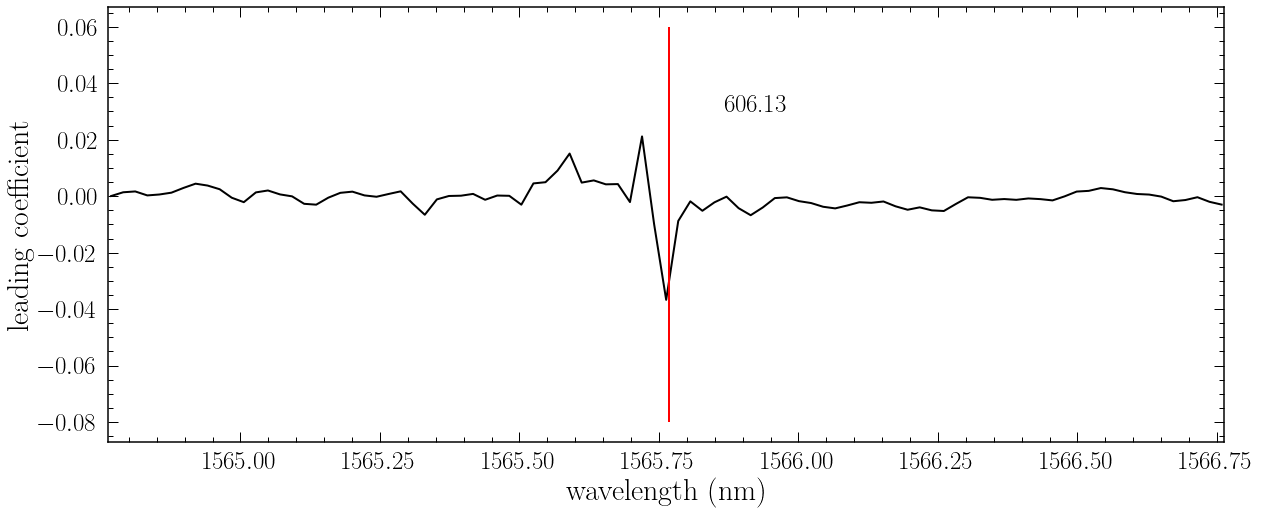

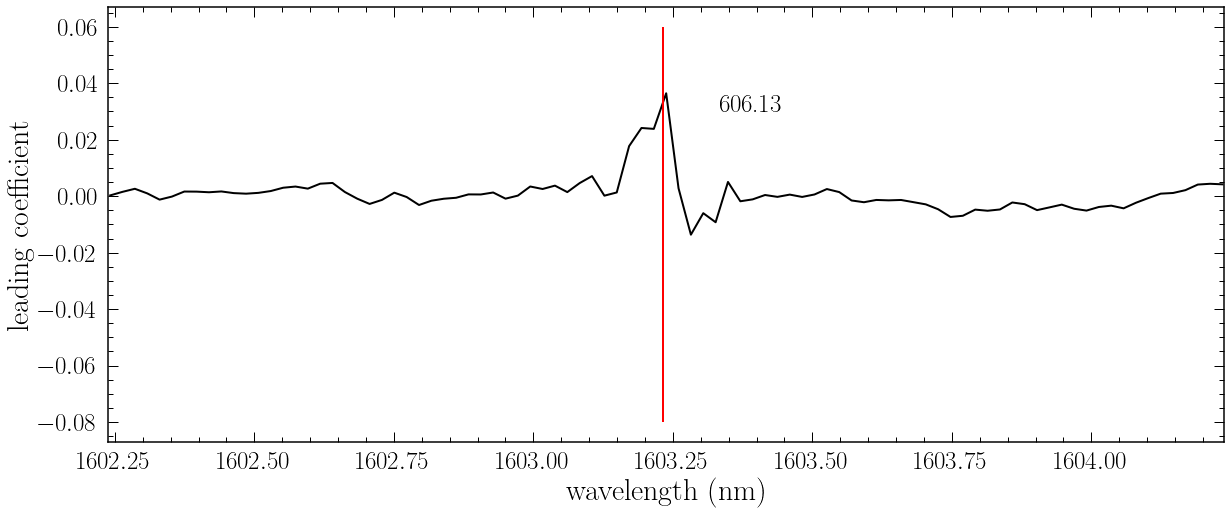

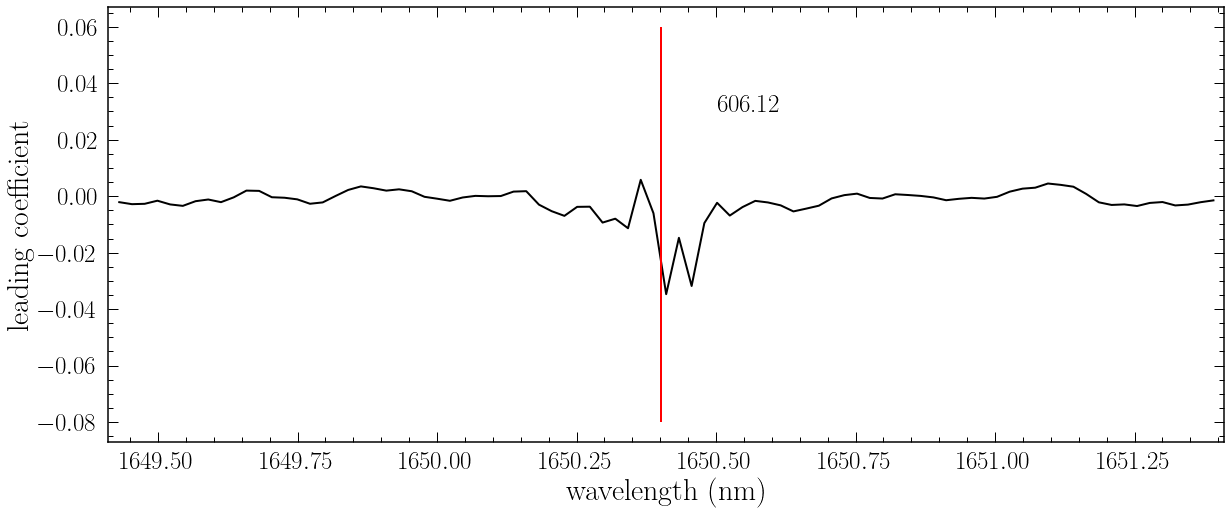

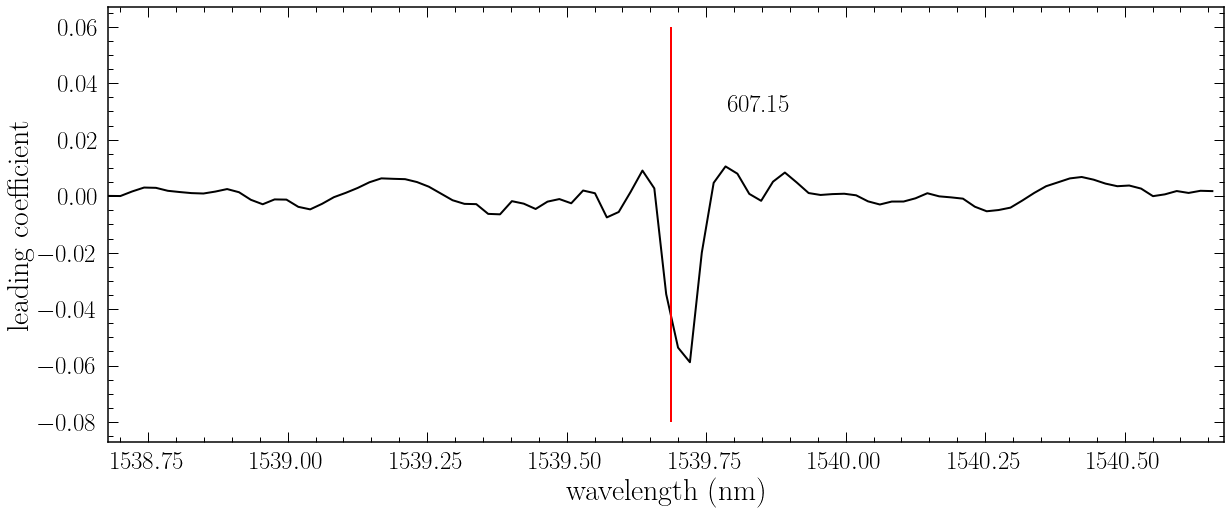

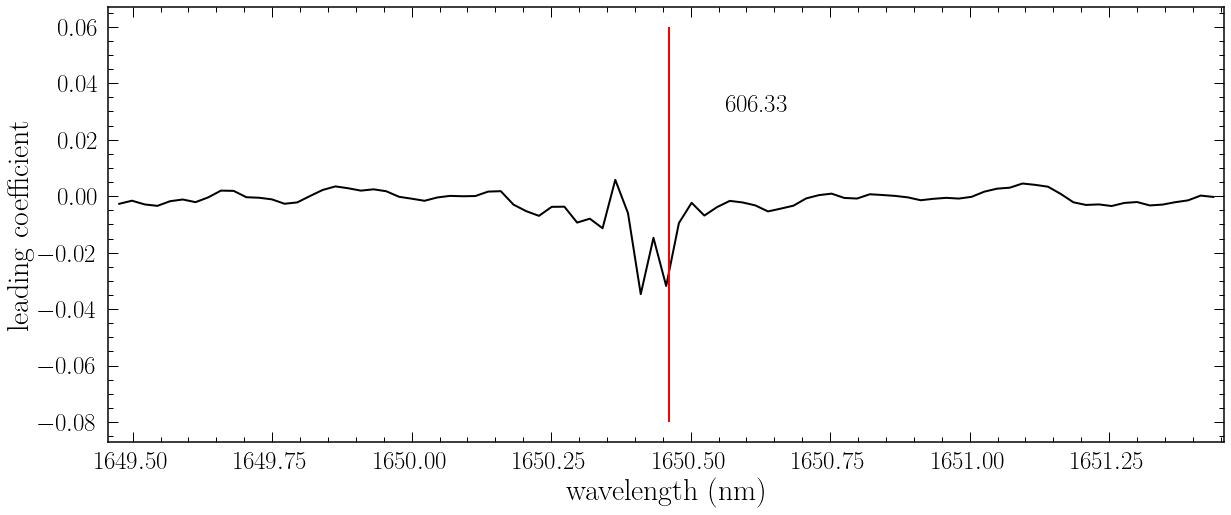

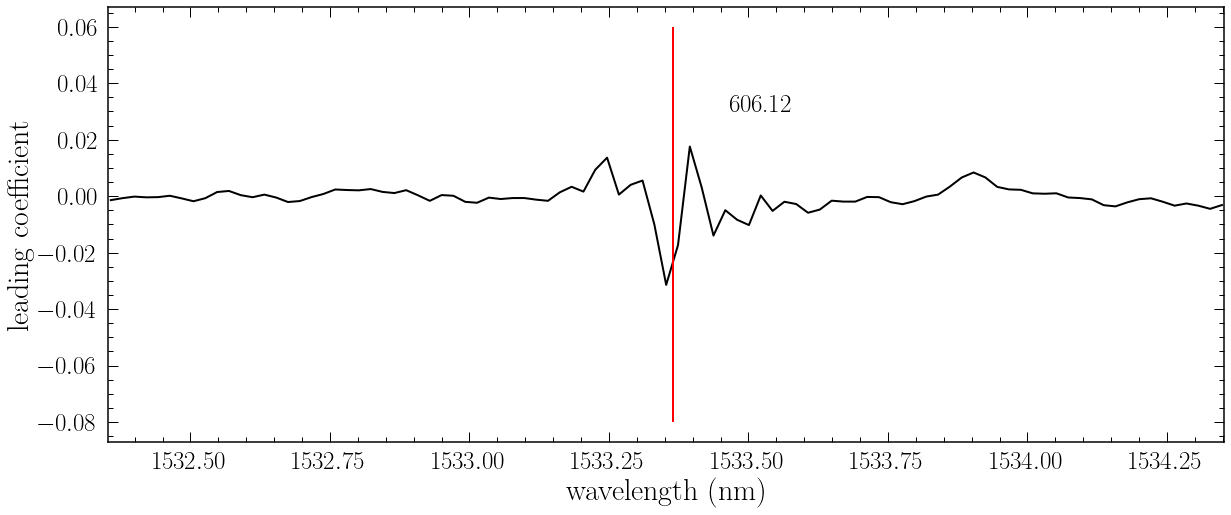

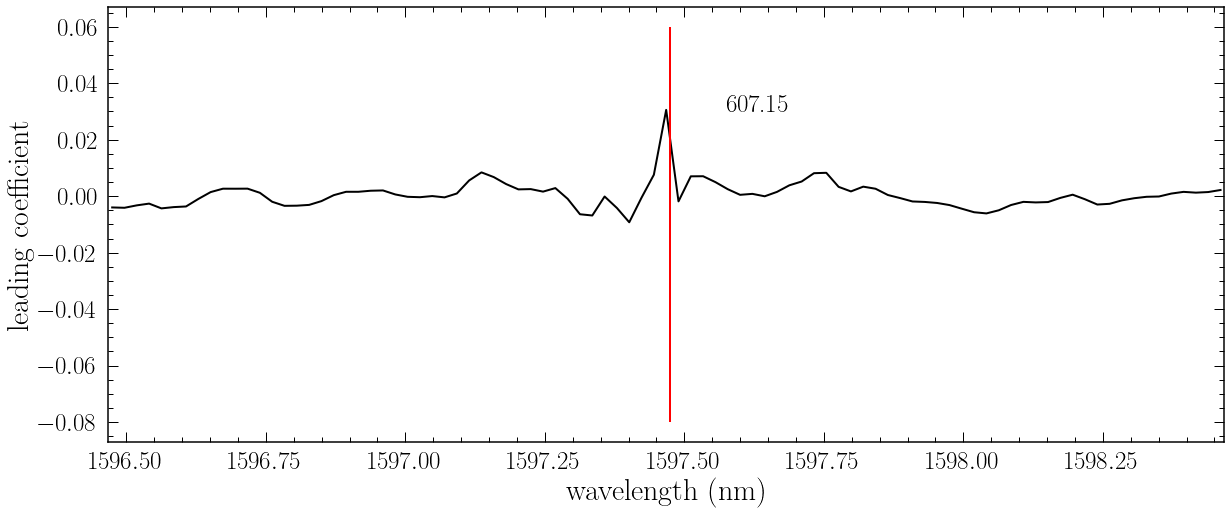

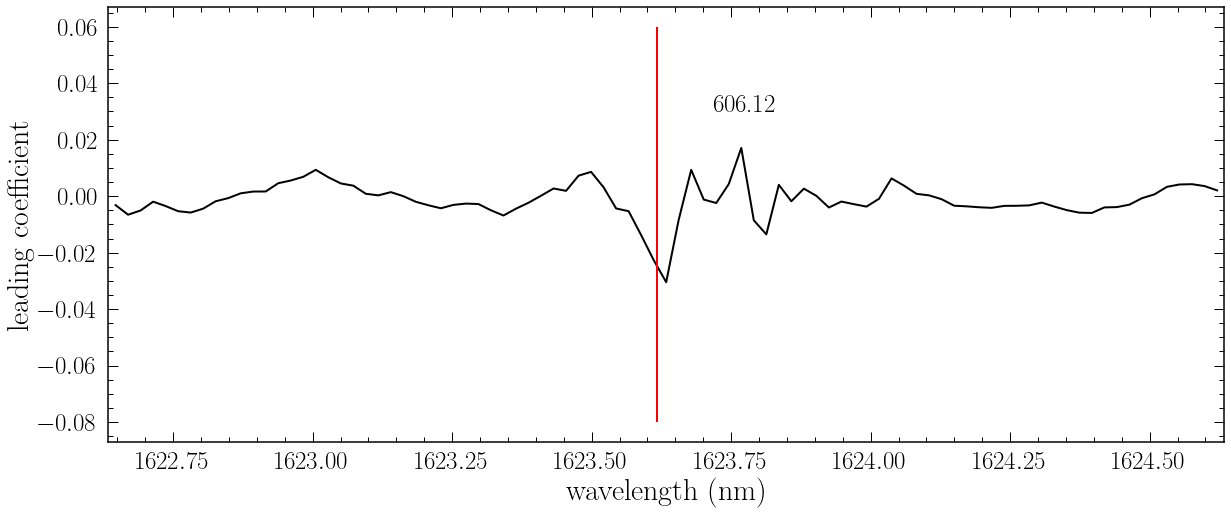

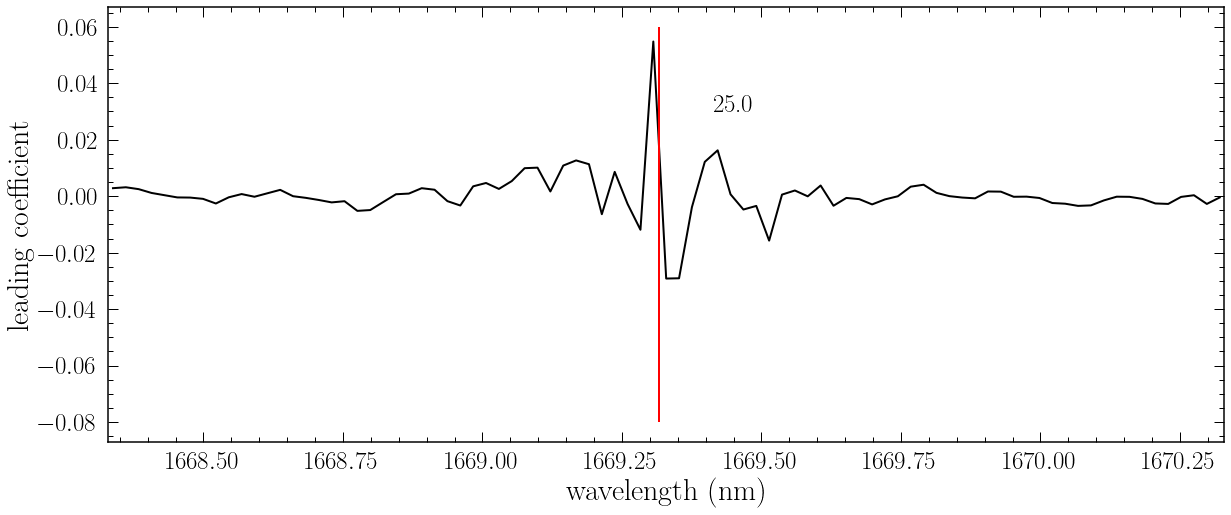

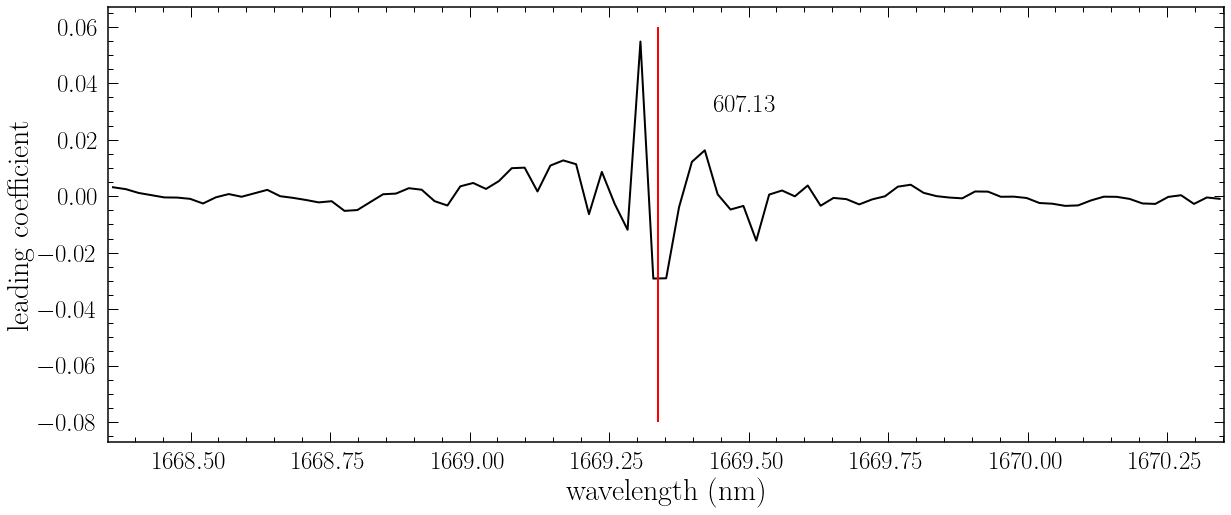

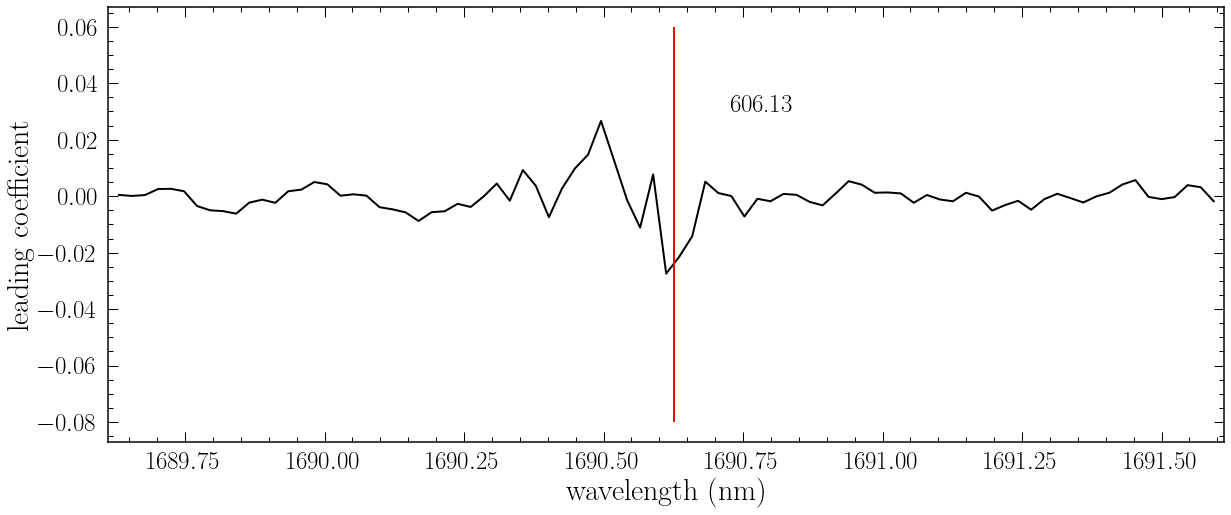

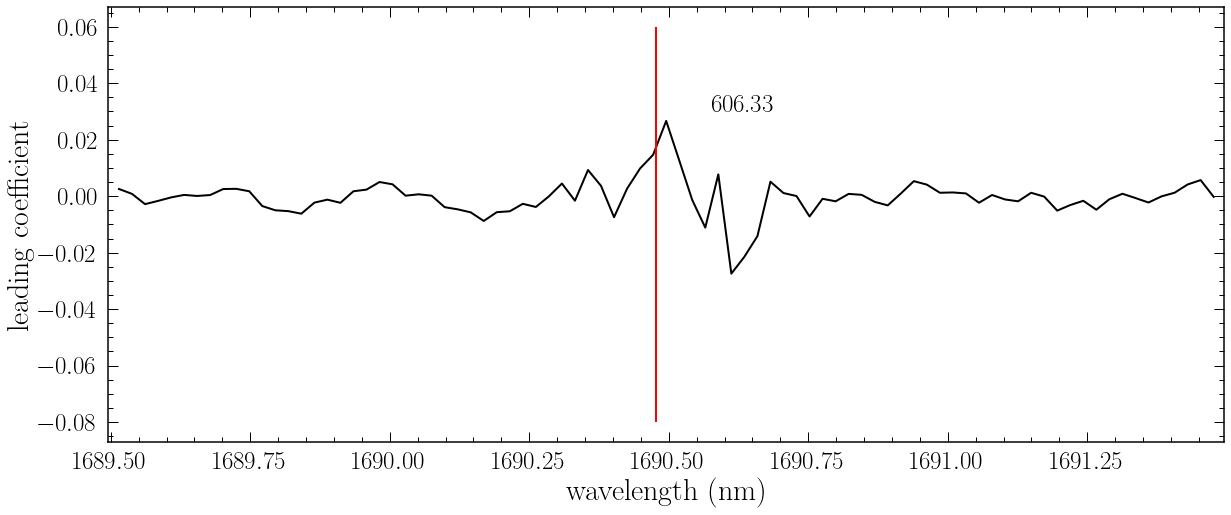

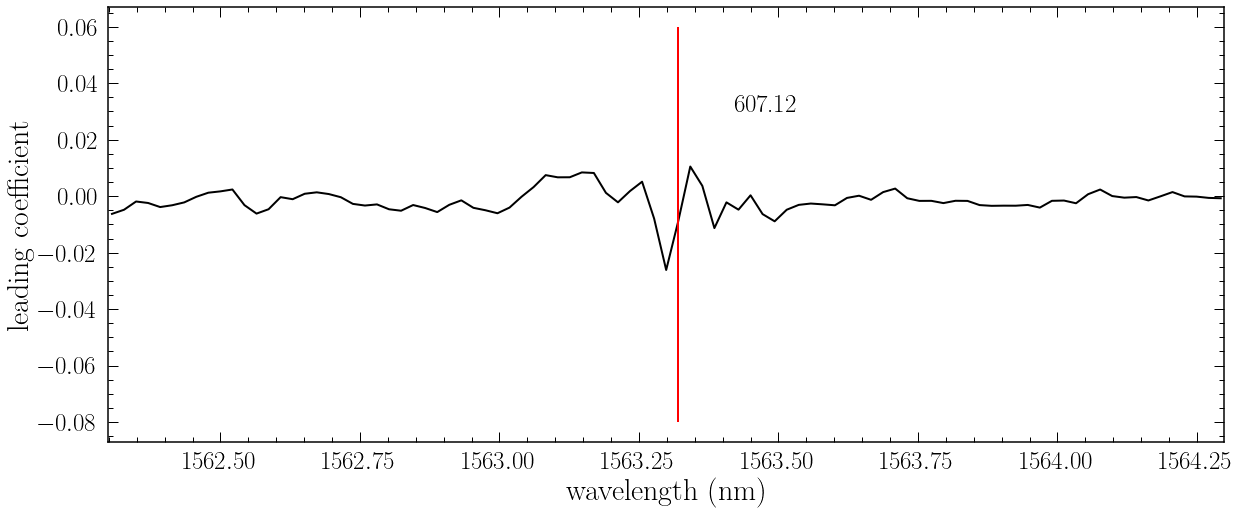

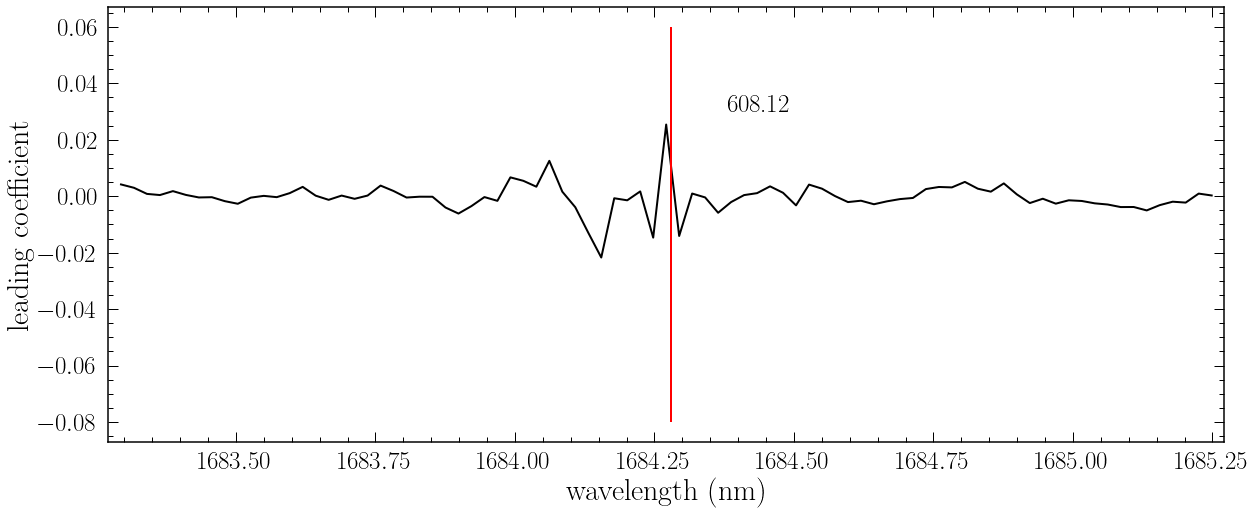

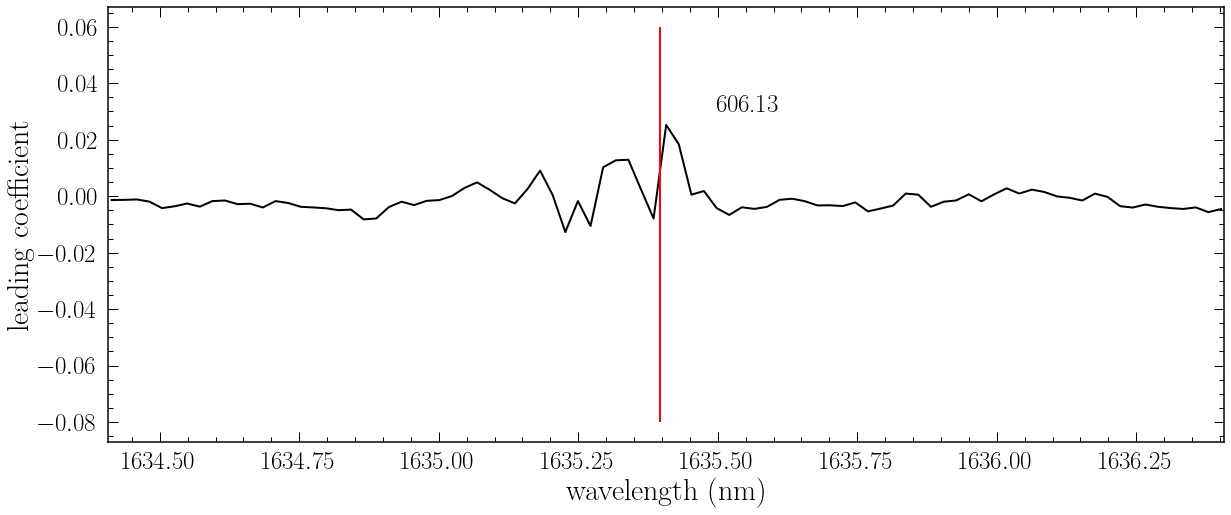

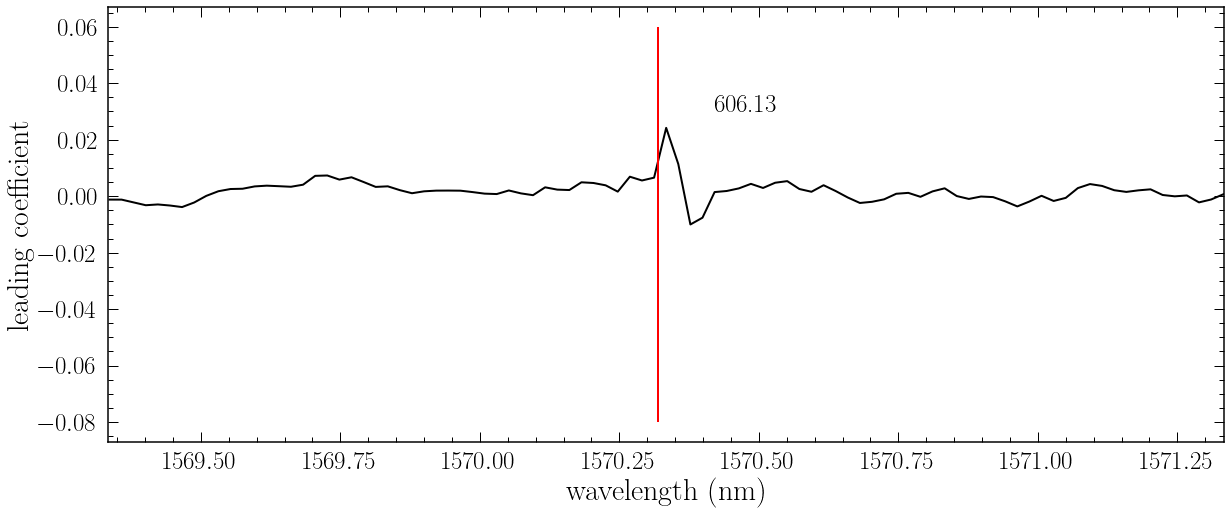

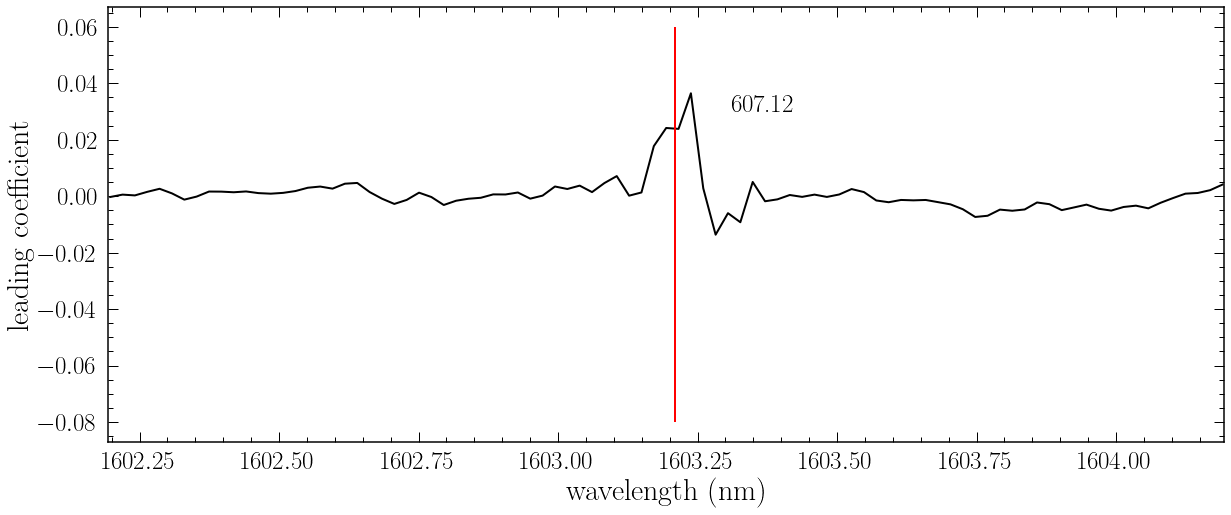

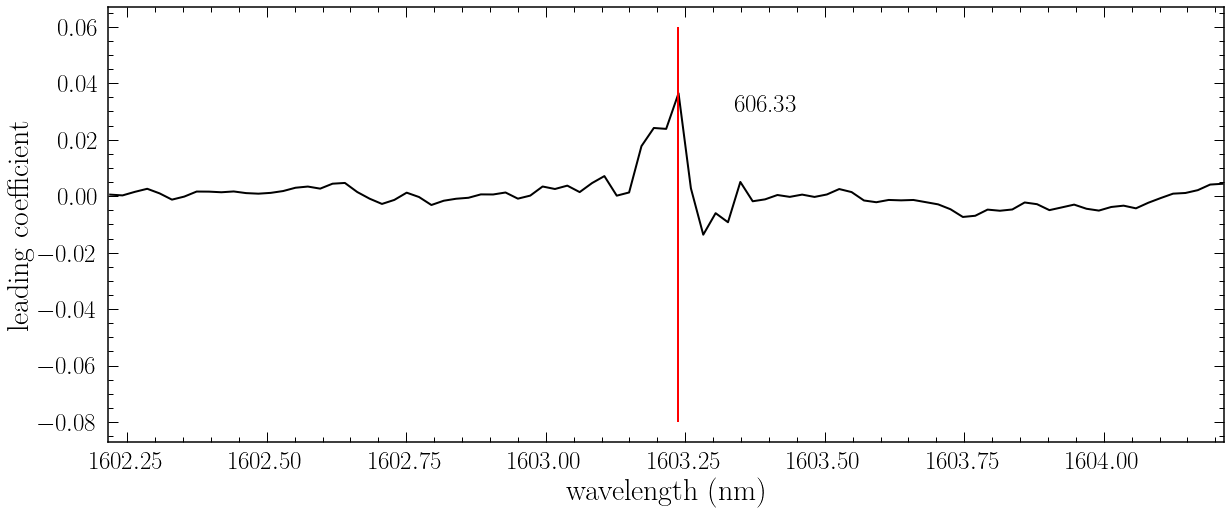

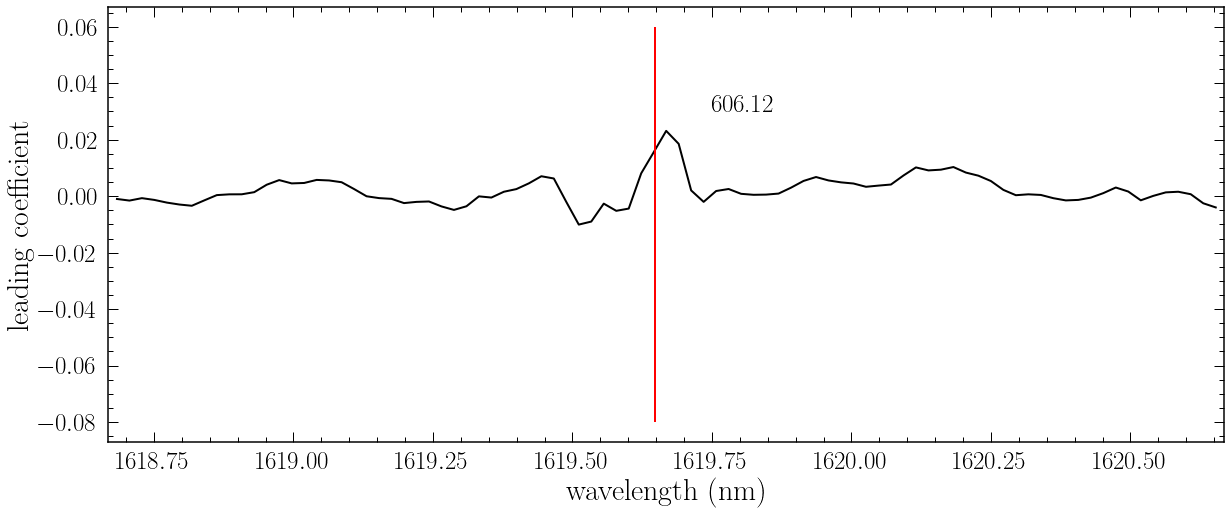

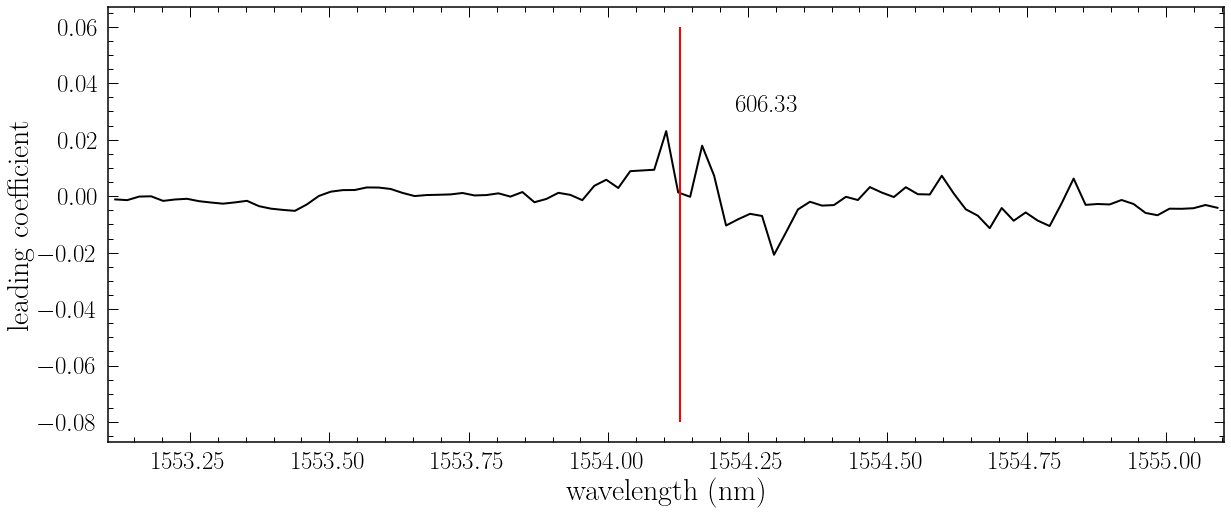

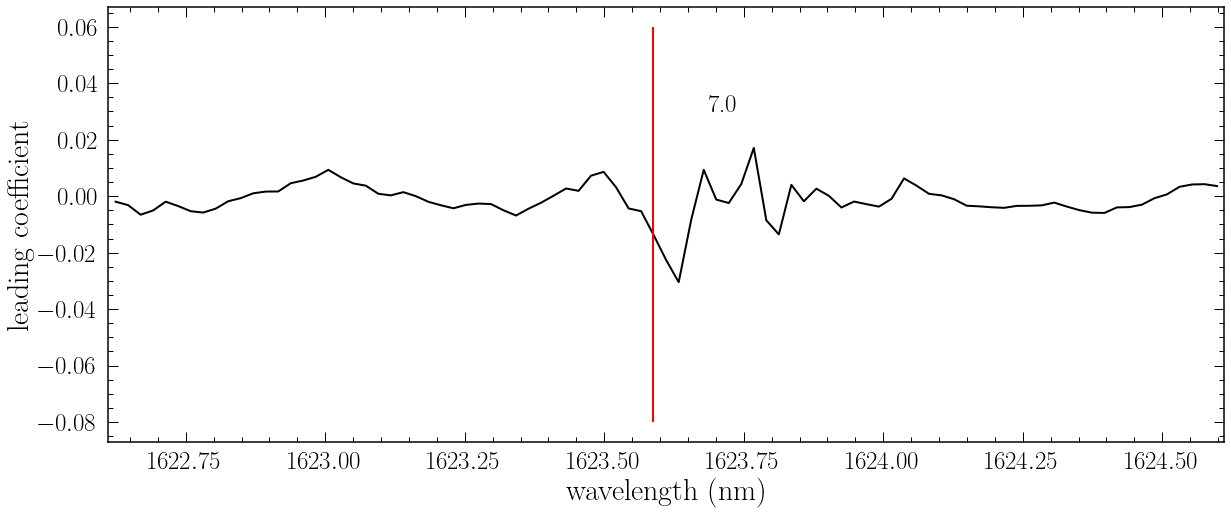

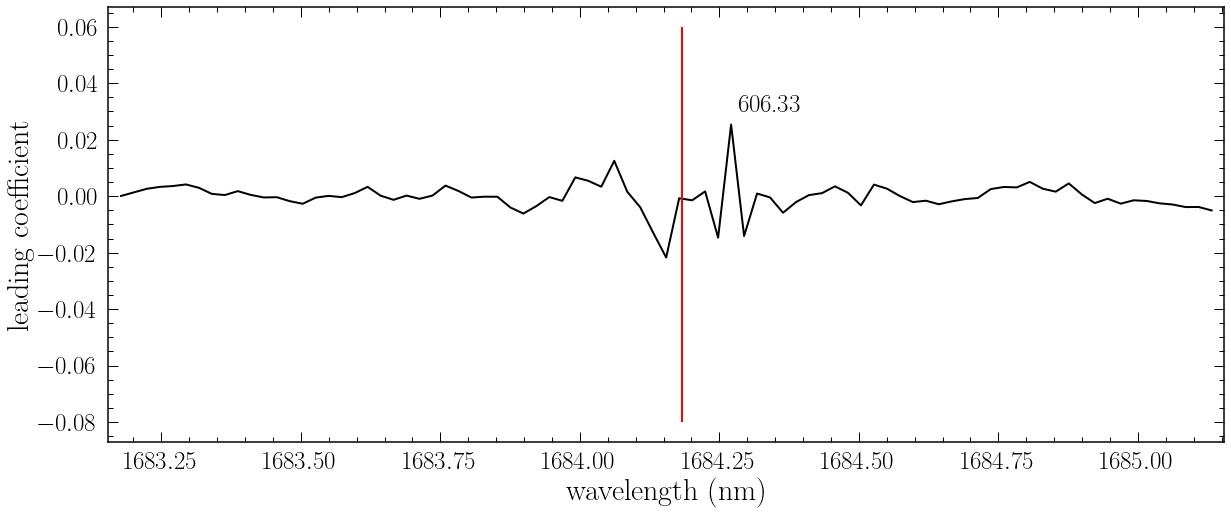

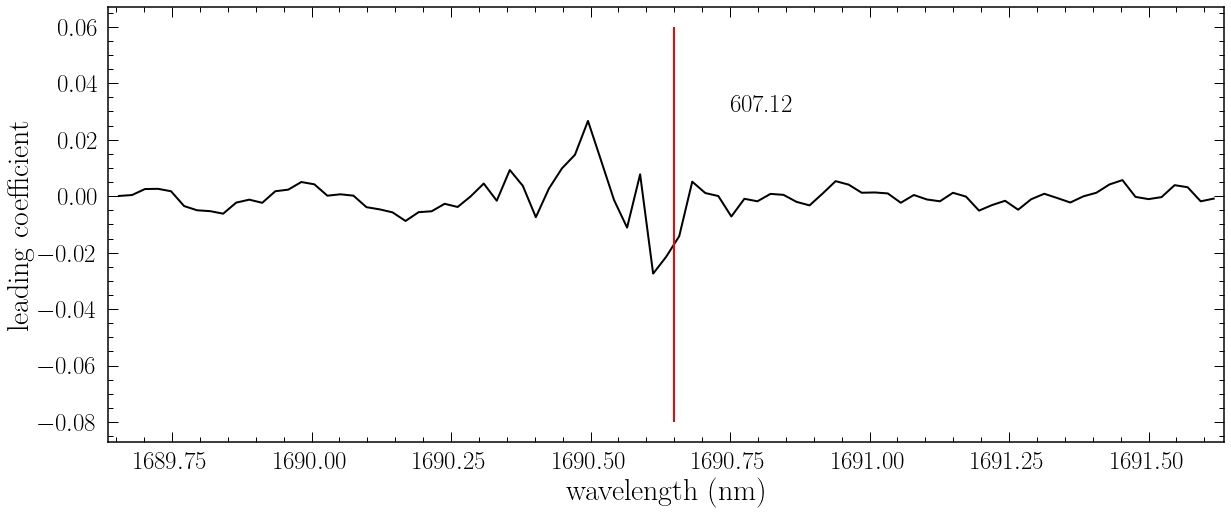

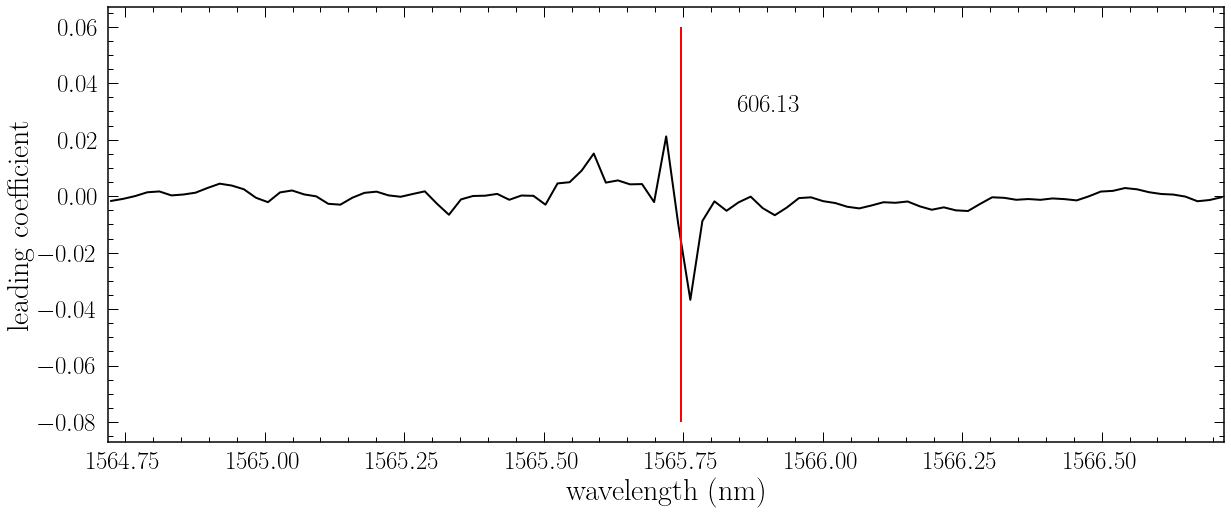

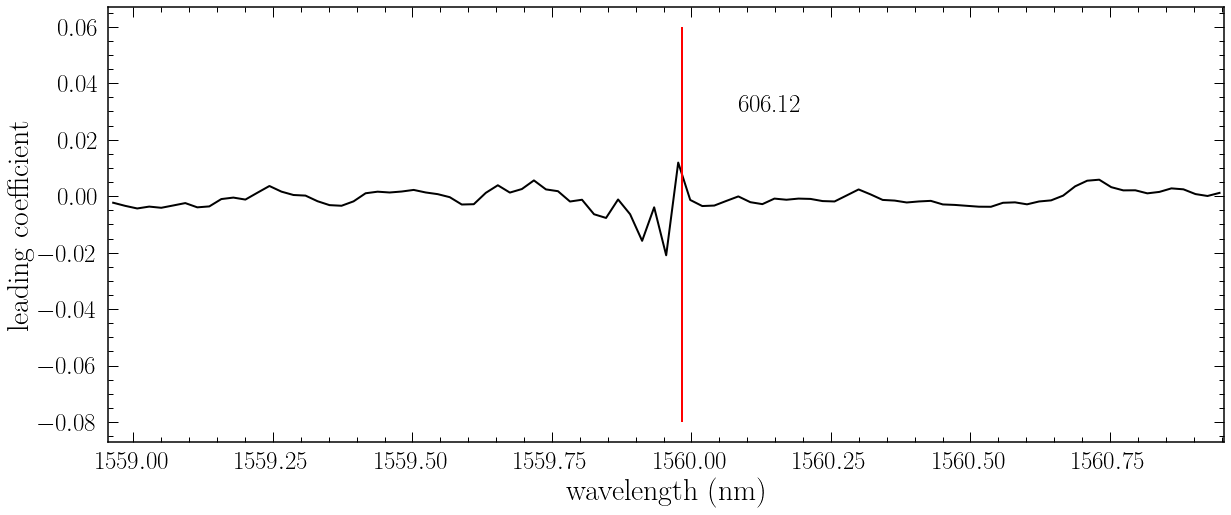

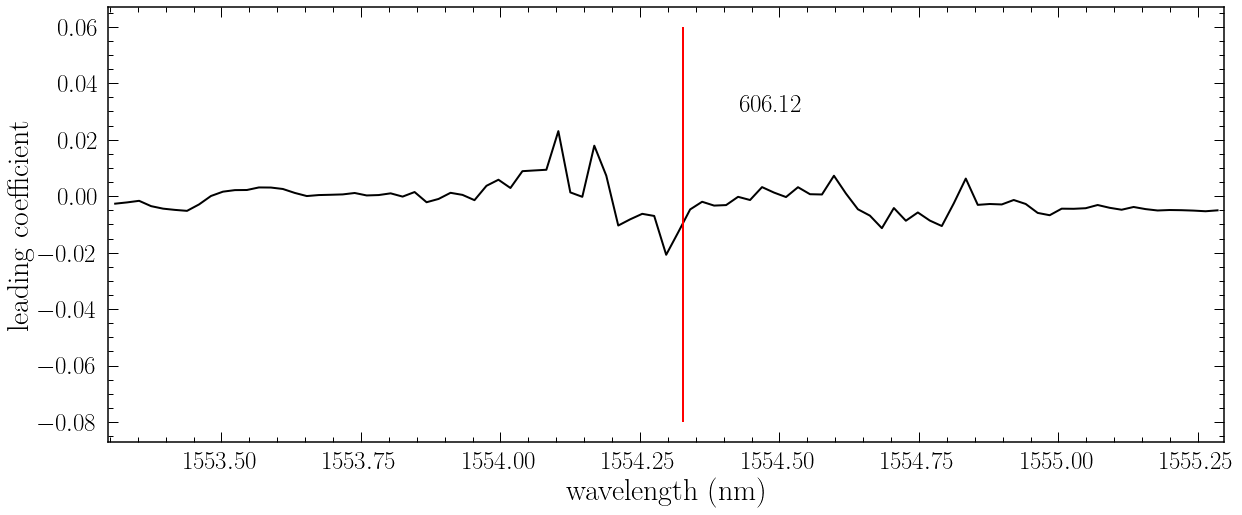

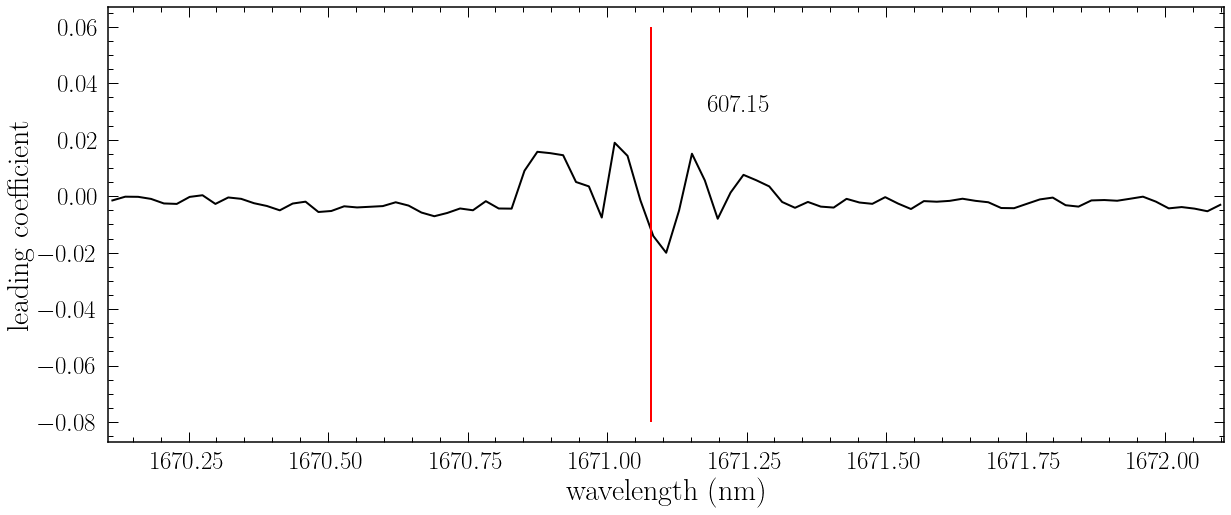

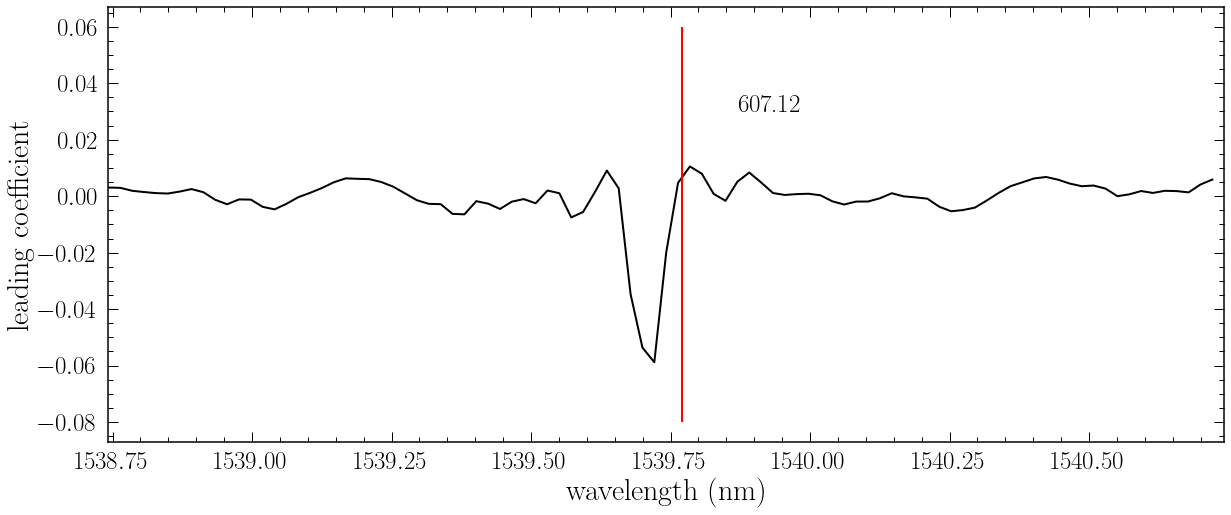

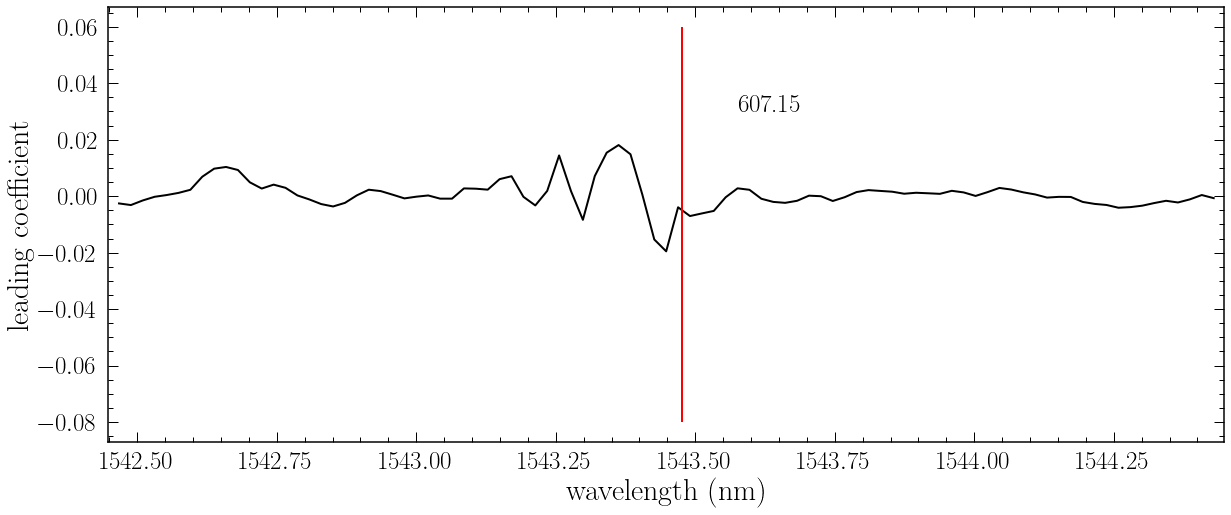

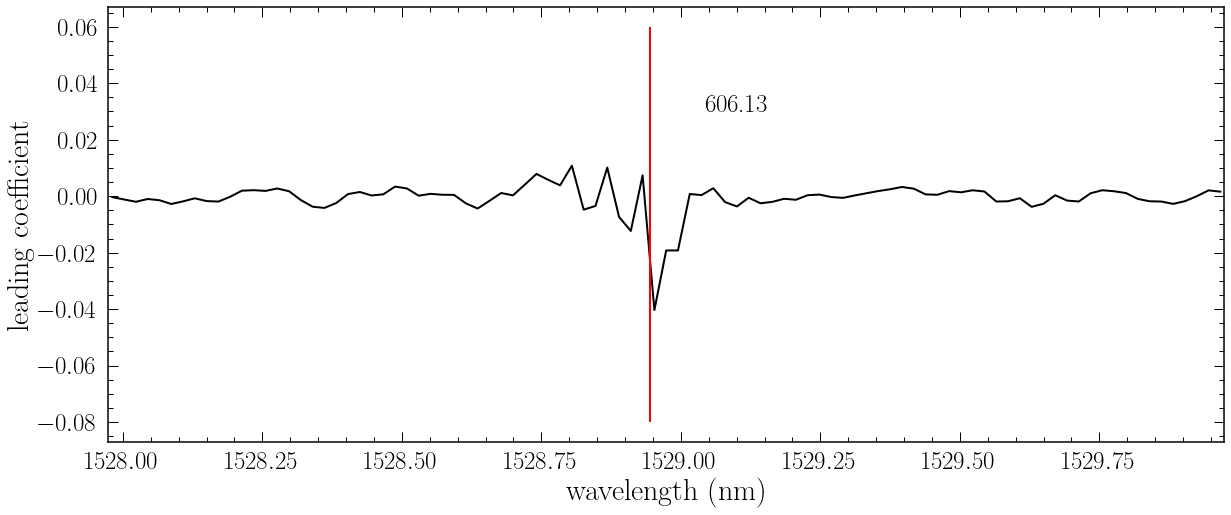

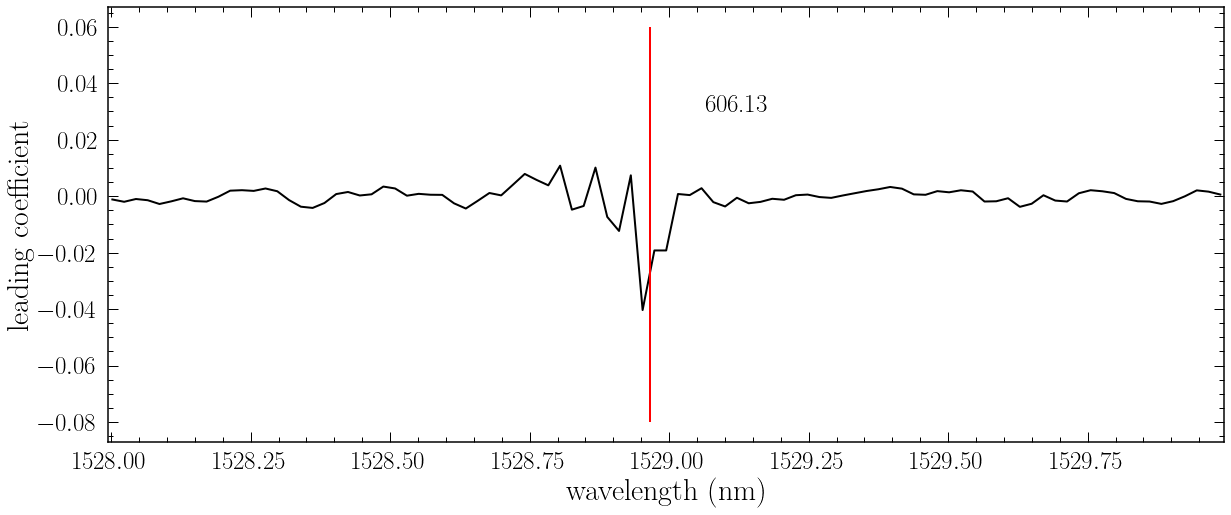

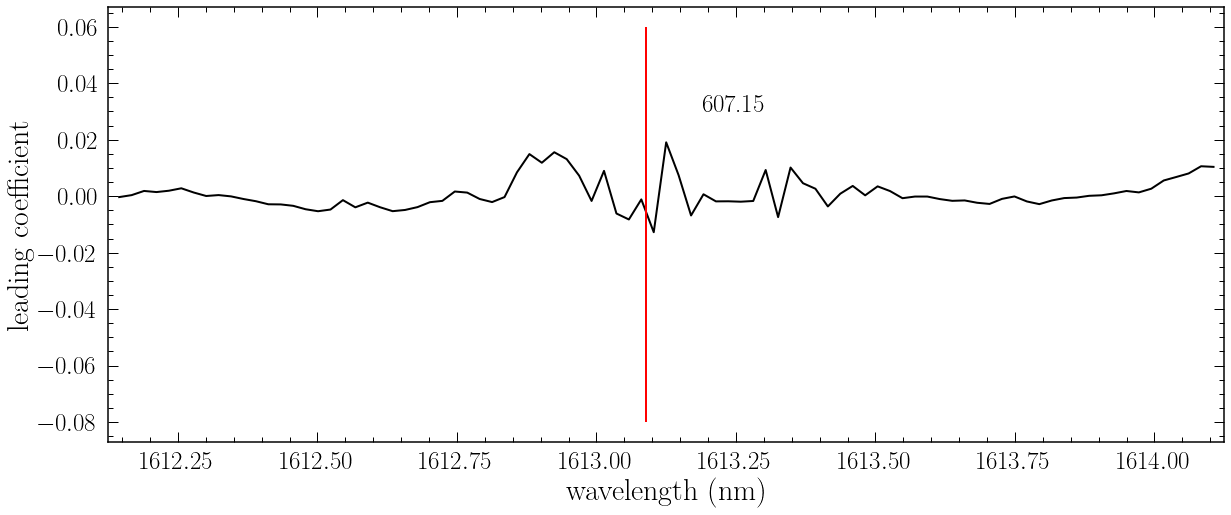

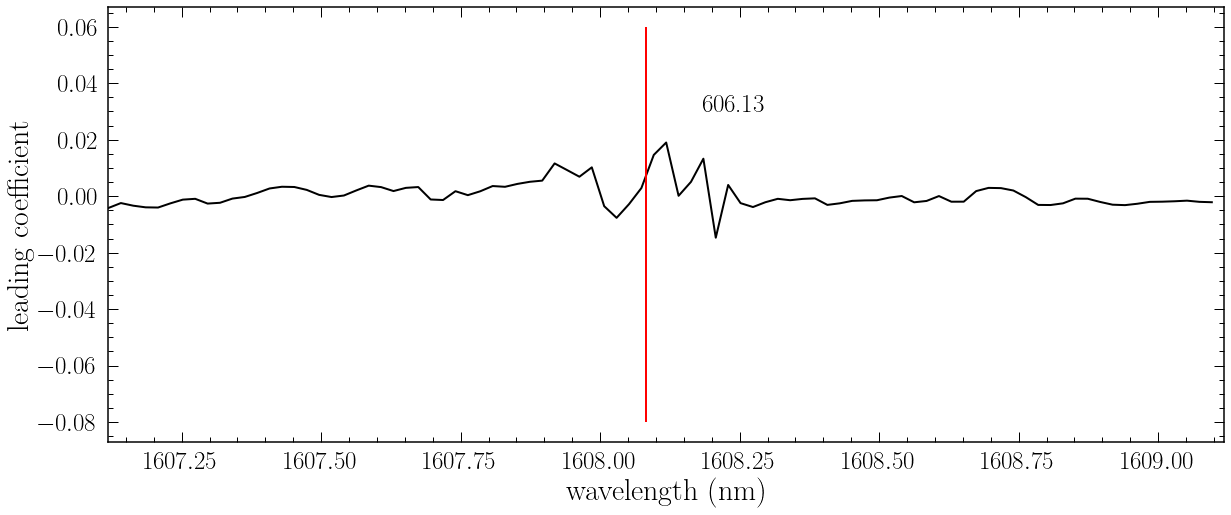

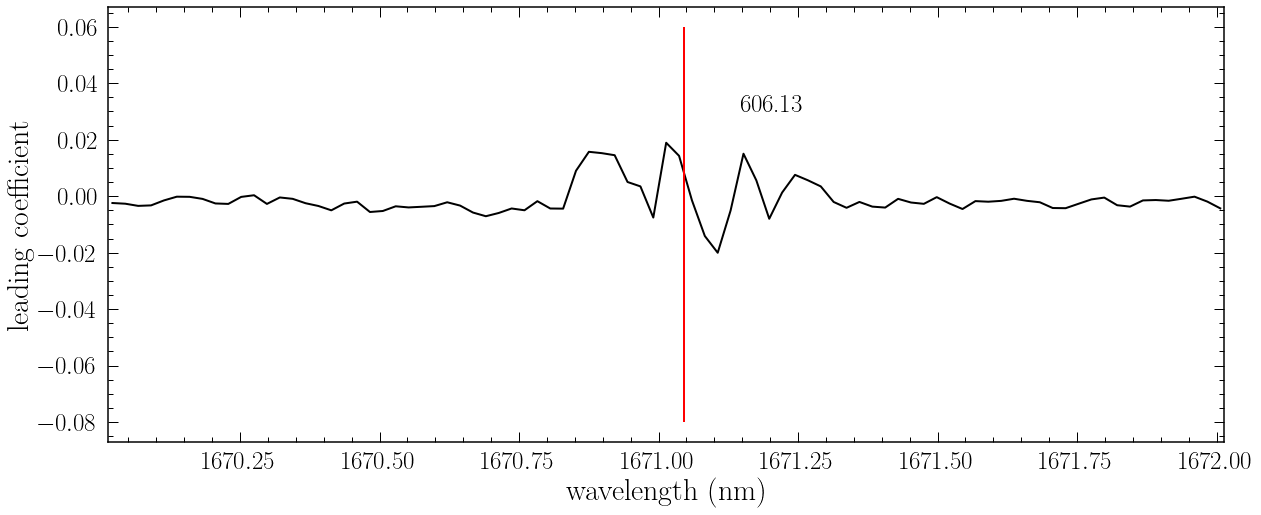

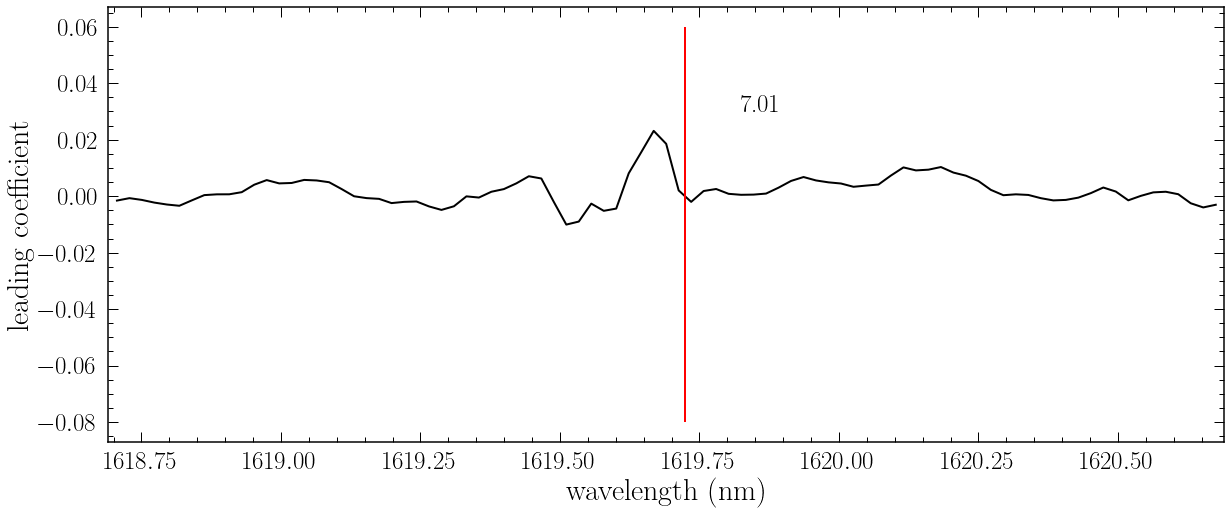

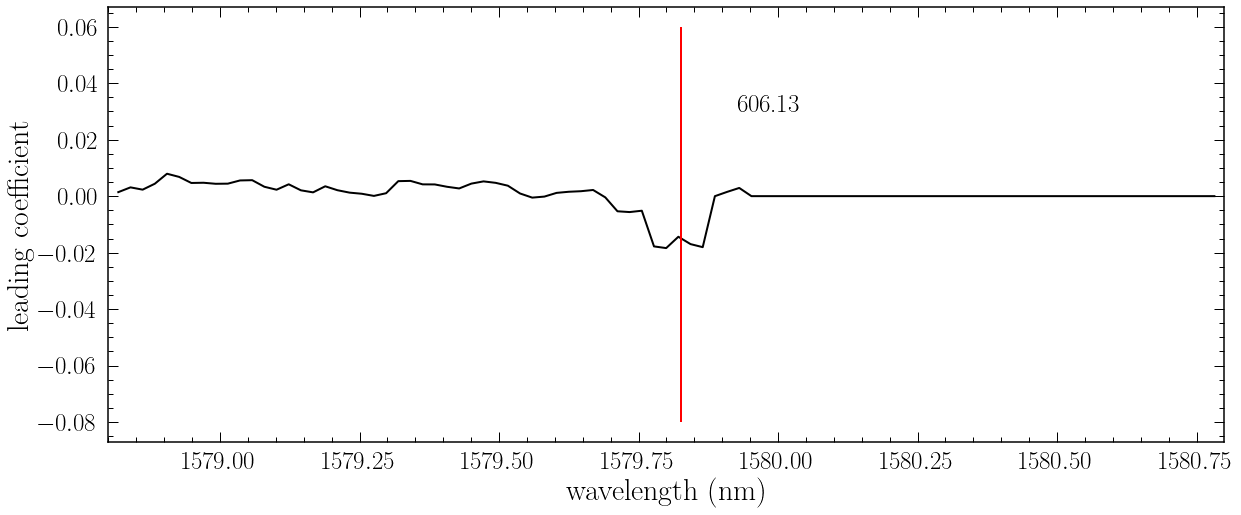

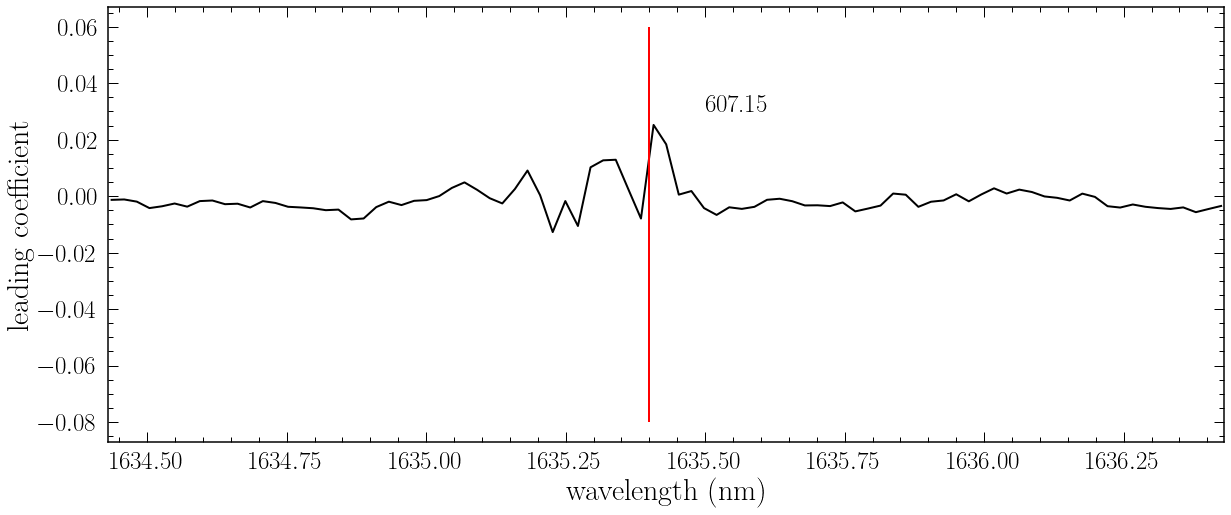

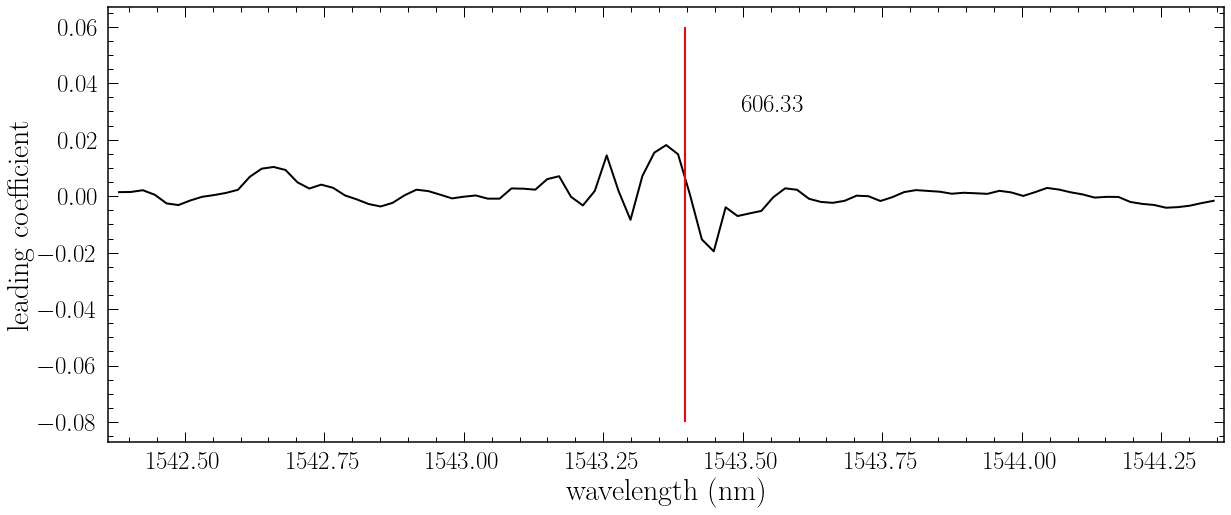

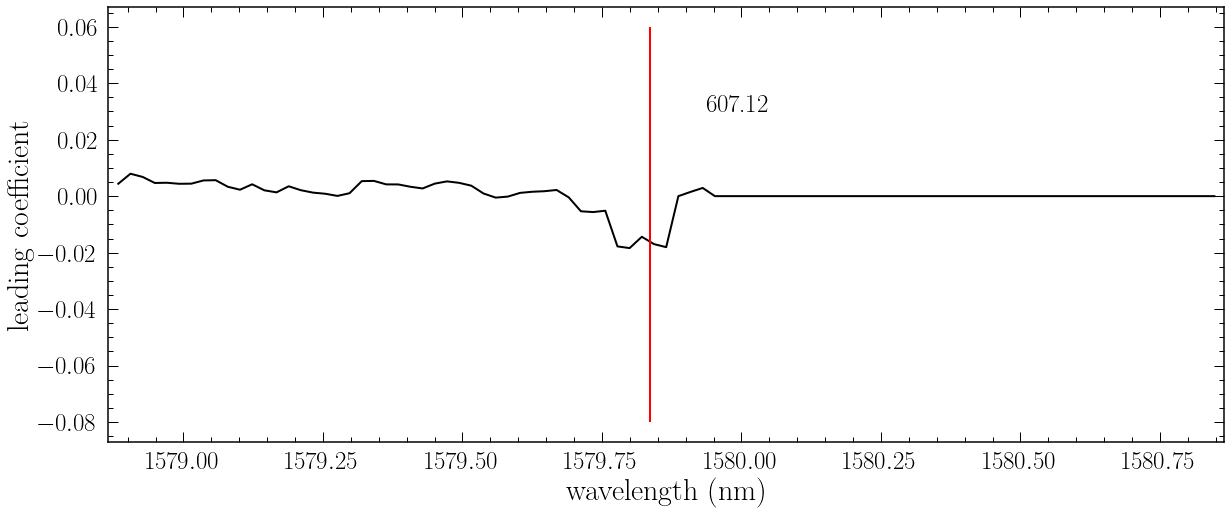

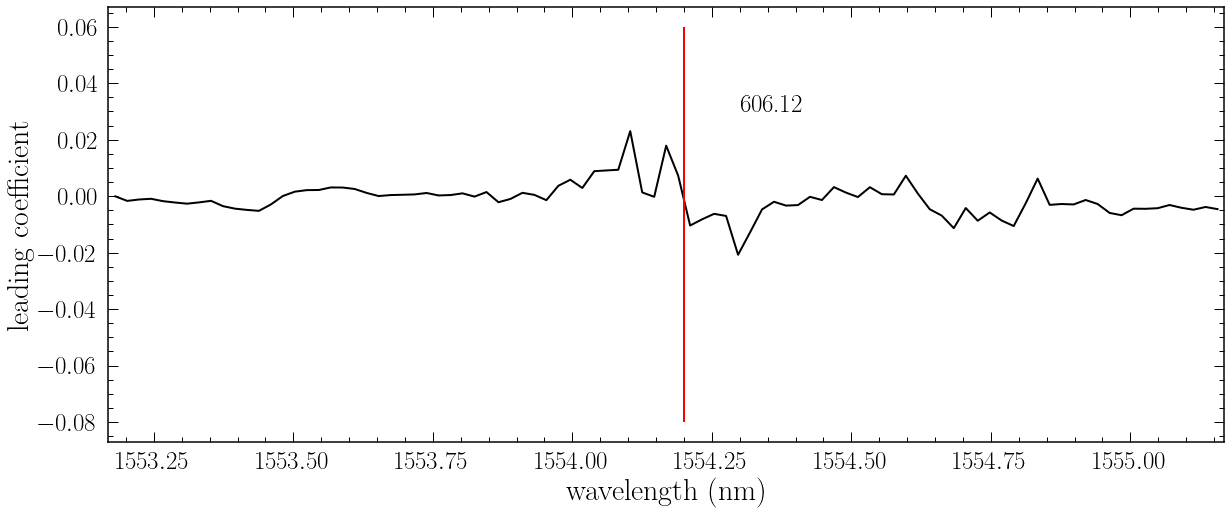

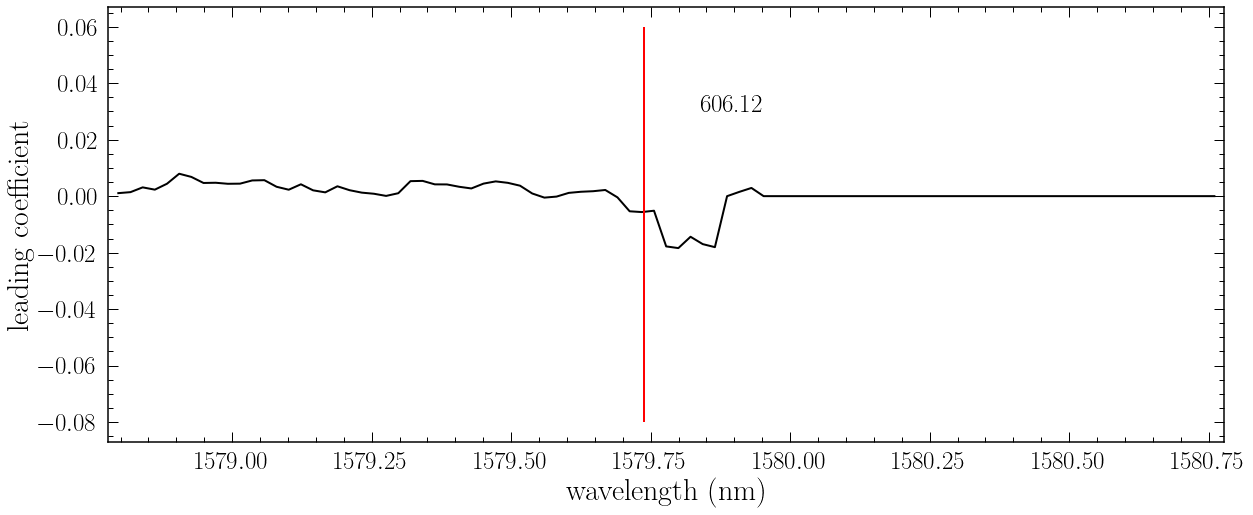

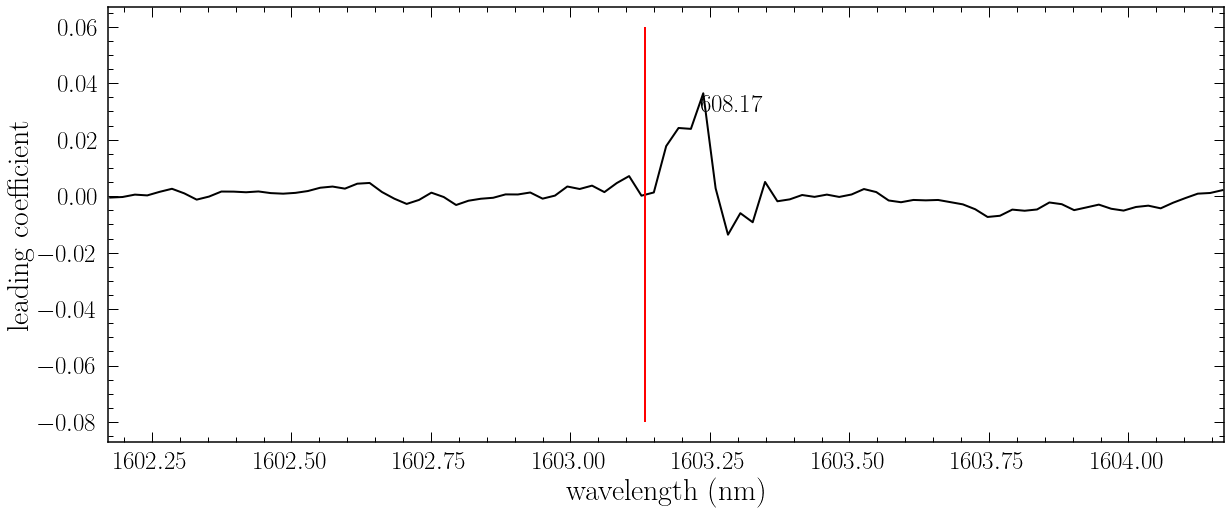

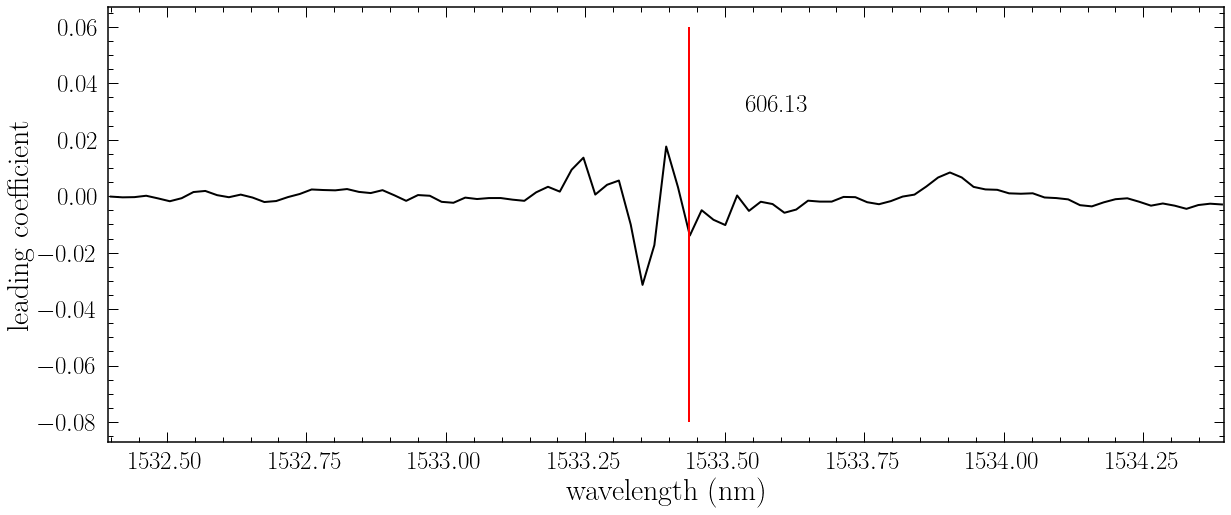

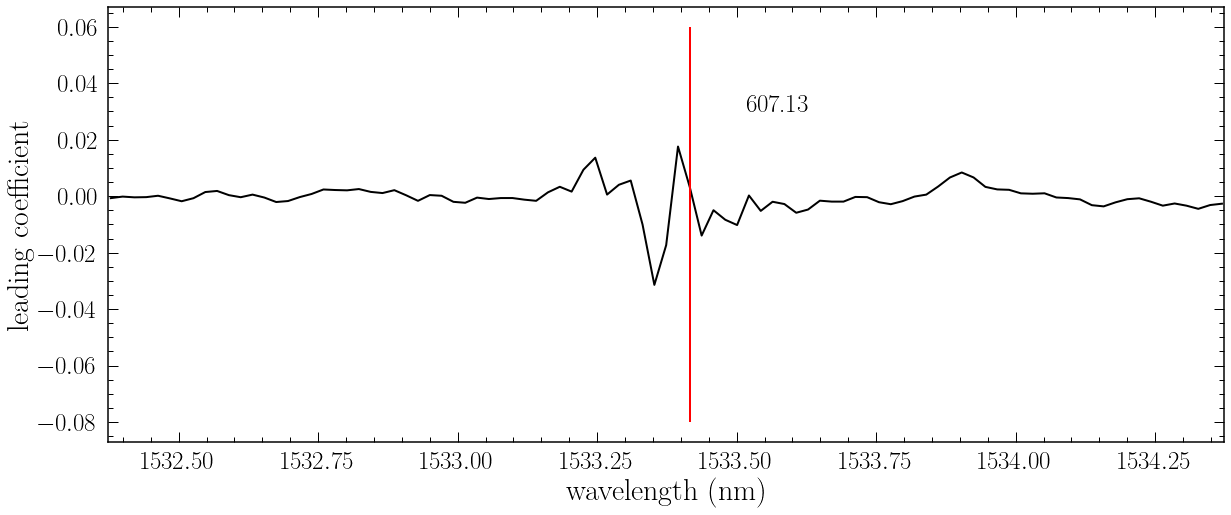

In [101]:
from HeaderP import *
#np.save('wl', ds.wl)
#np.save('agecoe', md.coeffs[:,3])
wl = np.load('wl.npy')
coef = np.load('agecoe.npy')

"""plt.figure(figsize=(30,8))
plt.plot(wl/10, coef, 'k-')
plt.xlabel('wavelength (nm)')
plt.ylabel('leading coefficient')"""


sort_coe, sort_wl = zip(*sorted(zip(abs(coef), wl/10)))

pltlin = 50
splitwl = 10

wlbins = np.linspace(min(wl/10), max(wl/10), splitwl)

impwl = sort_wl[-pltlin:]

for i in trange(len(impwl)):
    plt.figure(figsize=(20,8))
    m = (wl/10>impwl[-(i+1)]-1)&(wl/10<impwl[-(i+1)]+1)
    plt.plot(wl[m]/10, coef[m], 'k-')
    
    linelist['dist'] = abs(linelist['lambda']-impwl[-(i+1)])
    linelist = linelist.sort_values(by='dist')
    
    #plt.vlines(linelist[-(i+1)], ymin=-0.08, ymax=0.06, color='k', alpha=0.2)
    plt.vlines(linelist['lambda'].iloc[i], ymin=-0.08, ymax=0.06, 
               color='r', linewidth=2)
        
    plt.text(linelist['lambda'].iloc[i]+0.1, 0.03, 
                 str(linelist['specid'].iloc[i]), horizontalalignment='left',
                 fontsize=25)
    plt.xlim([impwl[-(i+1)]-1,impwl[-(i+1)]+1])
    plt.xlabel('wavelength (nm)')
    plt.ylabel('leading coefficient')
    